# Web Scraping 

In [98]:
# Import necessary library for Selenium Web Scraping
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import shutil
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException


# Keyword is the word to be searched in Linkedin for profile pdf
# numberOfProfiles is the number of profiles to be scrapped and downloaded from Linkedin
keyword = 'computer science'
numberOfProfiles = 2


# Install Chrome Driver for Selenium Scraping
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.maximize_window()


# Specify Search URL which is the Linkedin Login Page
search_url="https://www.linkedin.com/login"
driver.get(search_url)
time.sleep(1)


# Find the textbox location for username and password
username = driver.find_element_by_id('username')
password = driver.find_element_by_id('password')


# Enter the credentials to login to your own personal Linkedin profile
username.send_keys("razoralexjun0112@gmail.com")
password.send_keys("*RazorTech@1203")
username.submit()


# After login, search for the keyword, Linkedin will then output you the profile that is related to the keyword
search_url="https://www.linkedin.com/search/results/people/?keywords={q}&origin=CLUSTER_EXPANSION&sid=~1J"
driver.get(search_url.format(q=keyword))
time.sleep(1)

# Use a for loop to loop through the profile and click to download the profile as pdf
for i in range(numberOfProfiles):
    profile = driver.find_elements_by_css_selector(".app-aware-link[aria-hidden='false']")[i]
    driver.execute_script("arguments[0].click();", profile)
    time.sleep(1)
    element = driver.find_element_by_css_selector("[aria-label='More actions']")
    driver.execute_script("arguments[0].click();", element)
    time.sleep(1)
    element = driver.find_element_by_css_selector("[data-control-name='save_to_pdf']")
    driver.execute_script("arguments[0].click();", element)
    driver.back()
    time.sleep(0.5)
    

# Create a directory to store the downloaded file
parentDir = os.getcwd()
directory = "RawProfile"
path = os.path.join(parentDir, directory)
os.mkdir(path)


# Move the downloaded file from the Desktop download folder to your directory
source_dir = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Downloads') 
target_dir = './RawProfile'
file_names = os.listdir(source_dir)
    
for count in range(numberOfProfiles):
    shutil.move(os.path.join(source_dir, "Profile (" + str(count + 1) + ").pdf"), target_dir)

# Rename Downloaded File

In [99]:
# Renaming multiple files in a directory
# This rename function is to ensure that when handle with large amount of data, the sequence of file is looped accordingly
# For example, Profile1, Profile2 ... Profile10, Profile11
# If it is not renamed, file sequence to be looped will be -> Profile1, Profile11, Profile2 ...
# Hence we have to rename it into json_0000, json_0001 ... json_0010, json_0011 ..

 
folder = "./RawProfile"
for count, filename in enumerate(os.listdir(folder)):
    if count < 10:
        sequence = "000" + str(count)
    elif count < 100:
        sequence = "00" + str(count)
    elif count < 1000:
        sequence = "0" + str(count)

    dst = f"json_{sequence}.pdf"
    src =f"{folder}/{filename}" 
    dst =f"{folder}/{dst}"

    os.rename(src, dst)
 

# View Raw Resume pdf


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


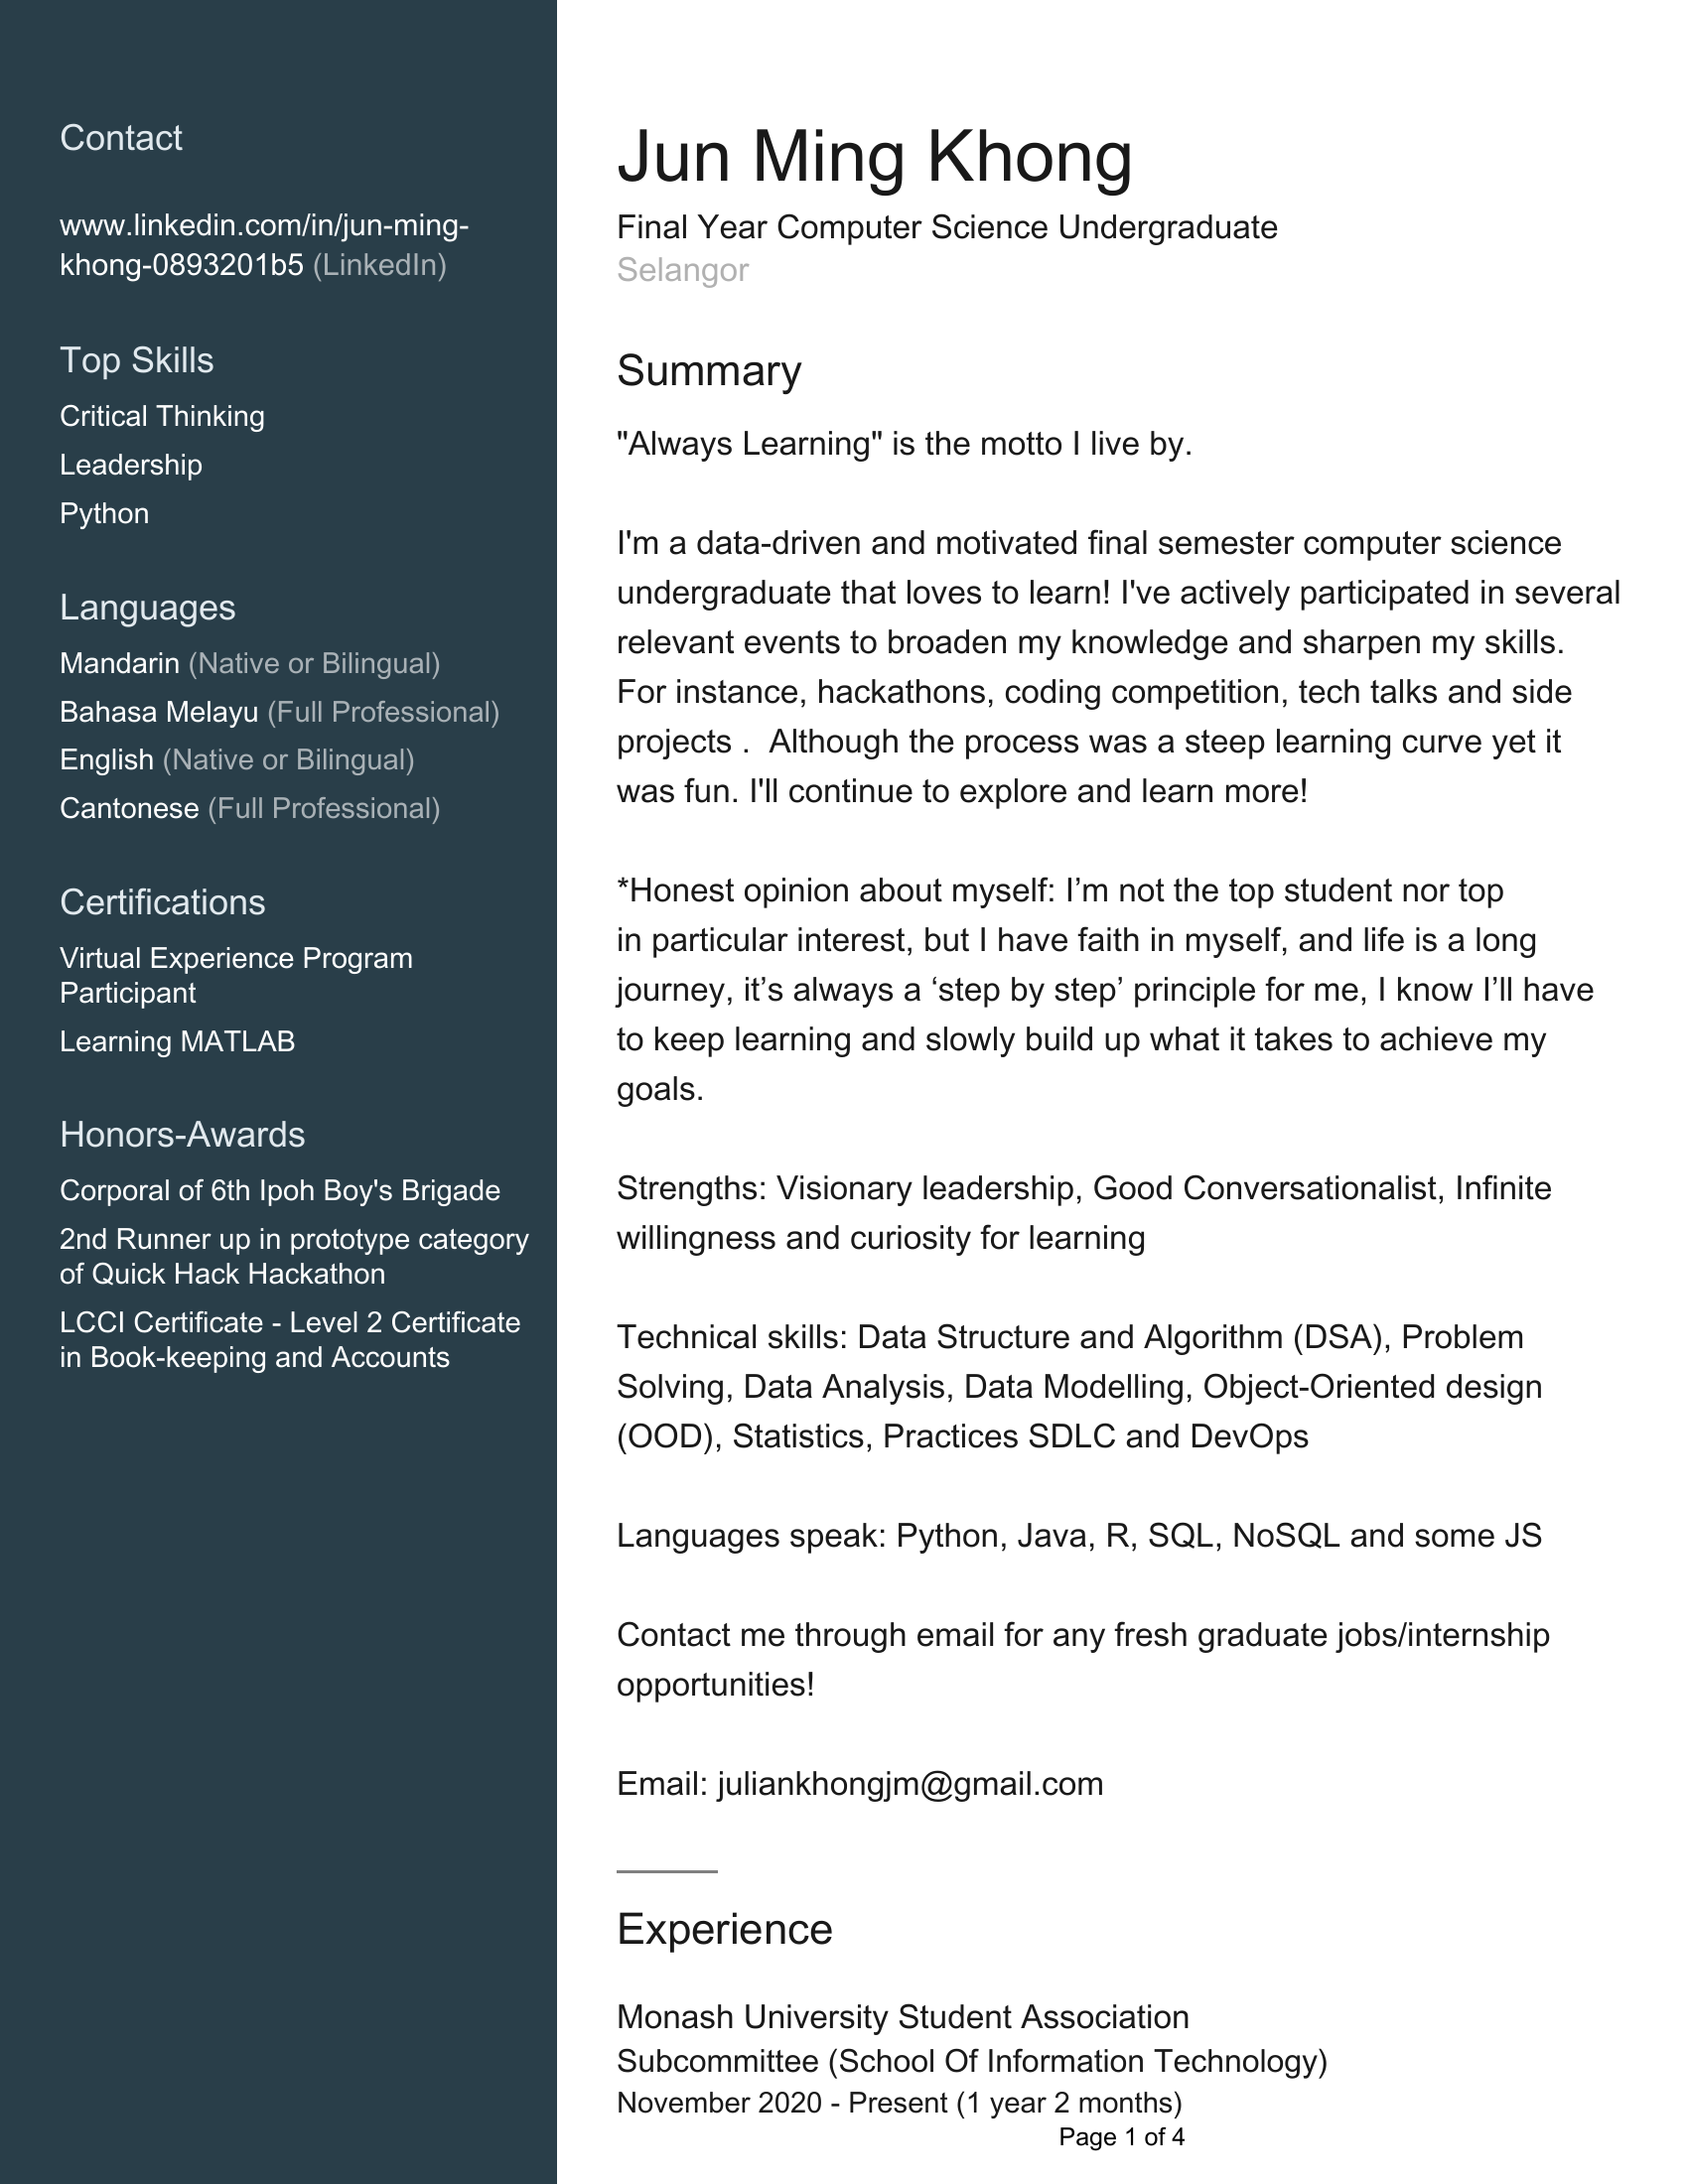

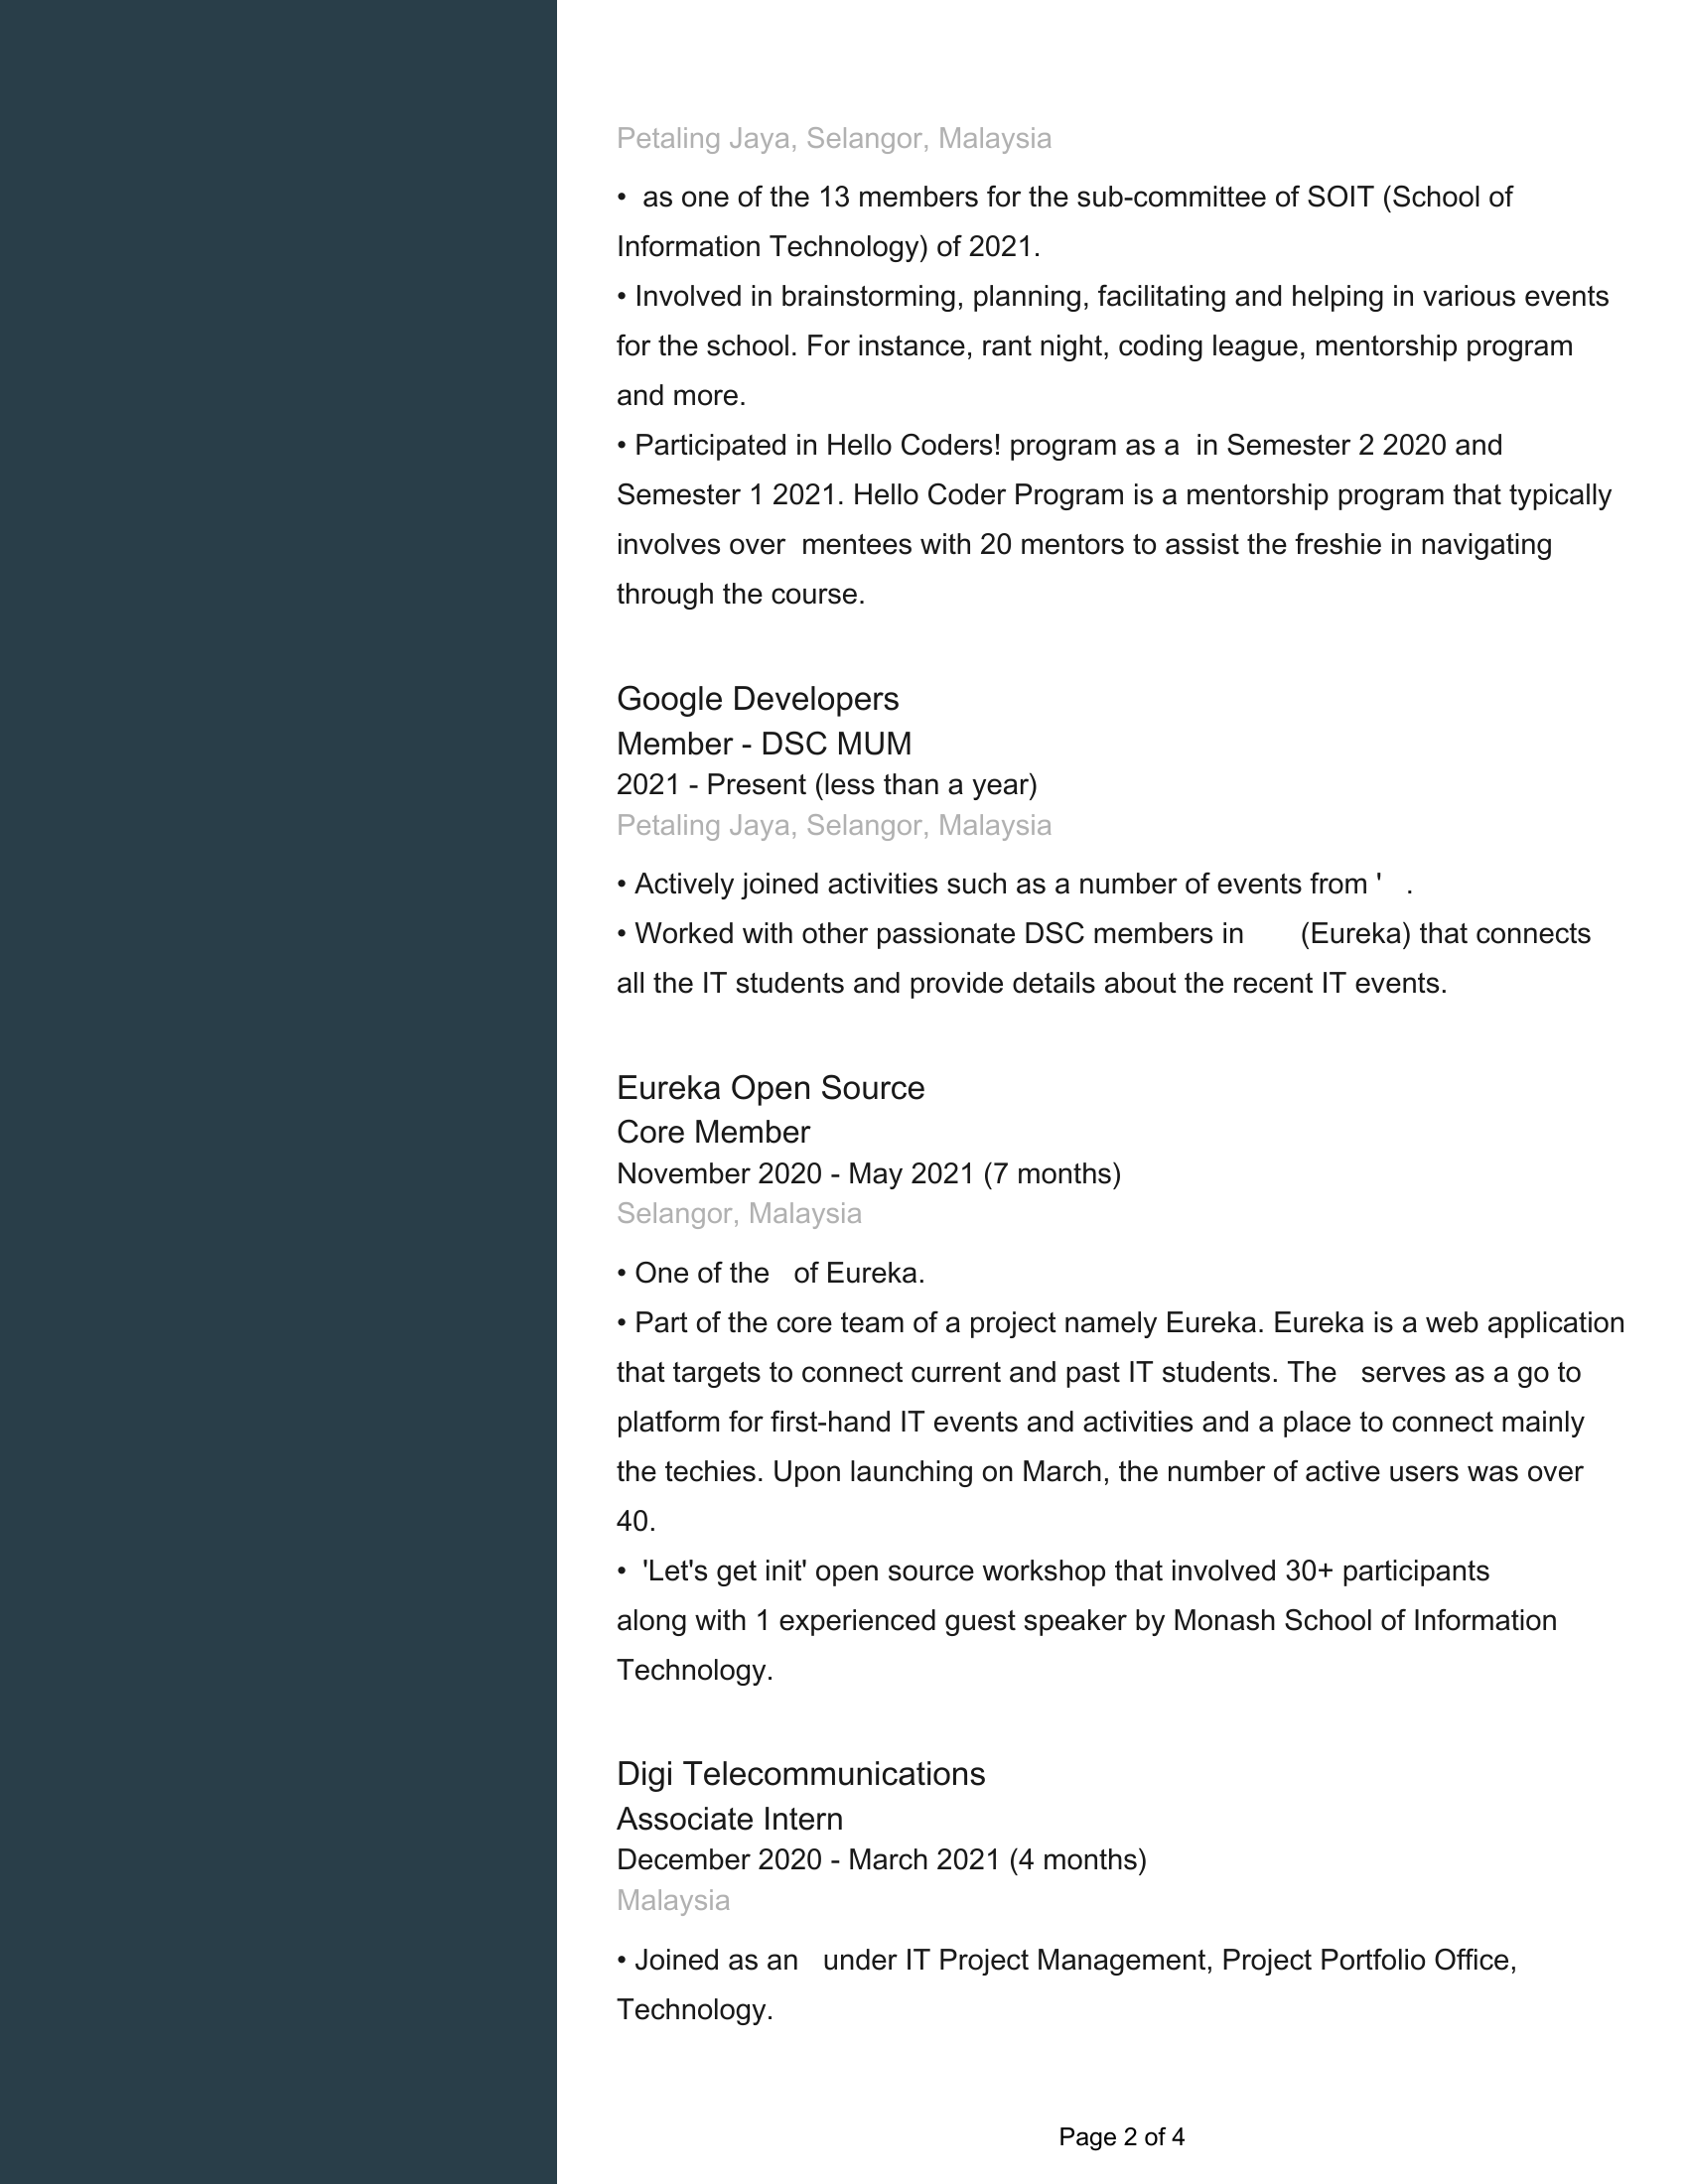

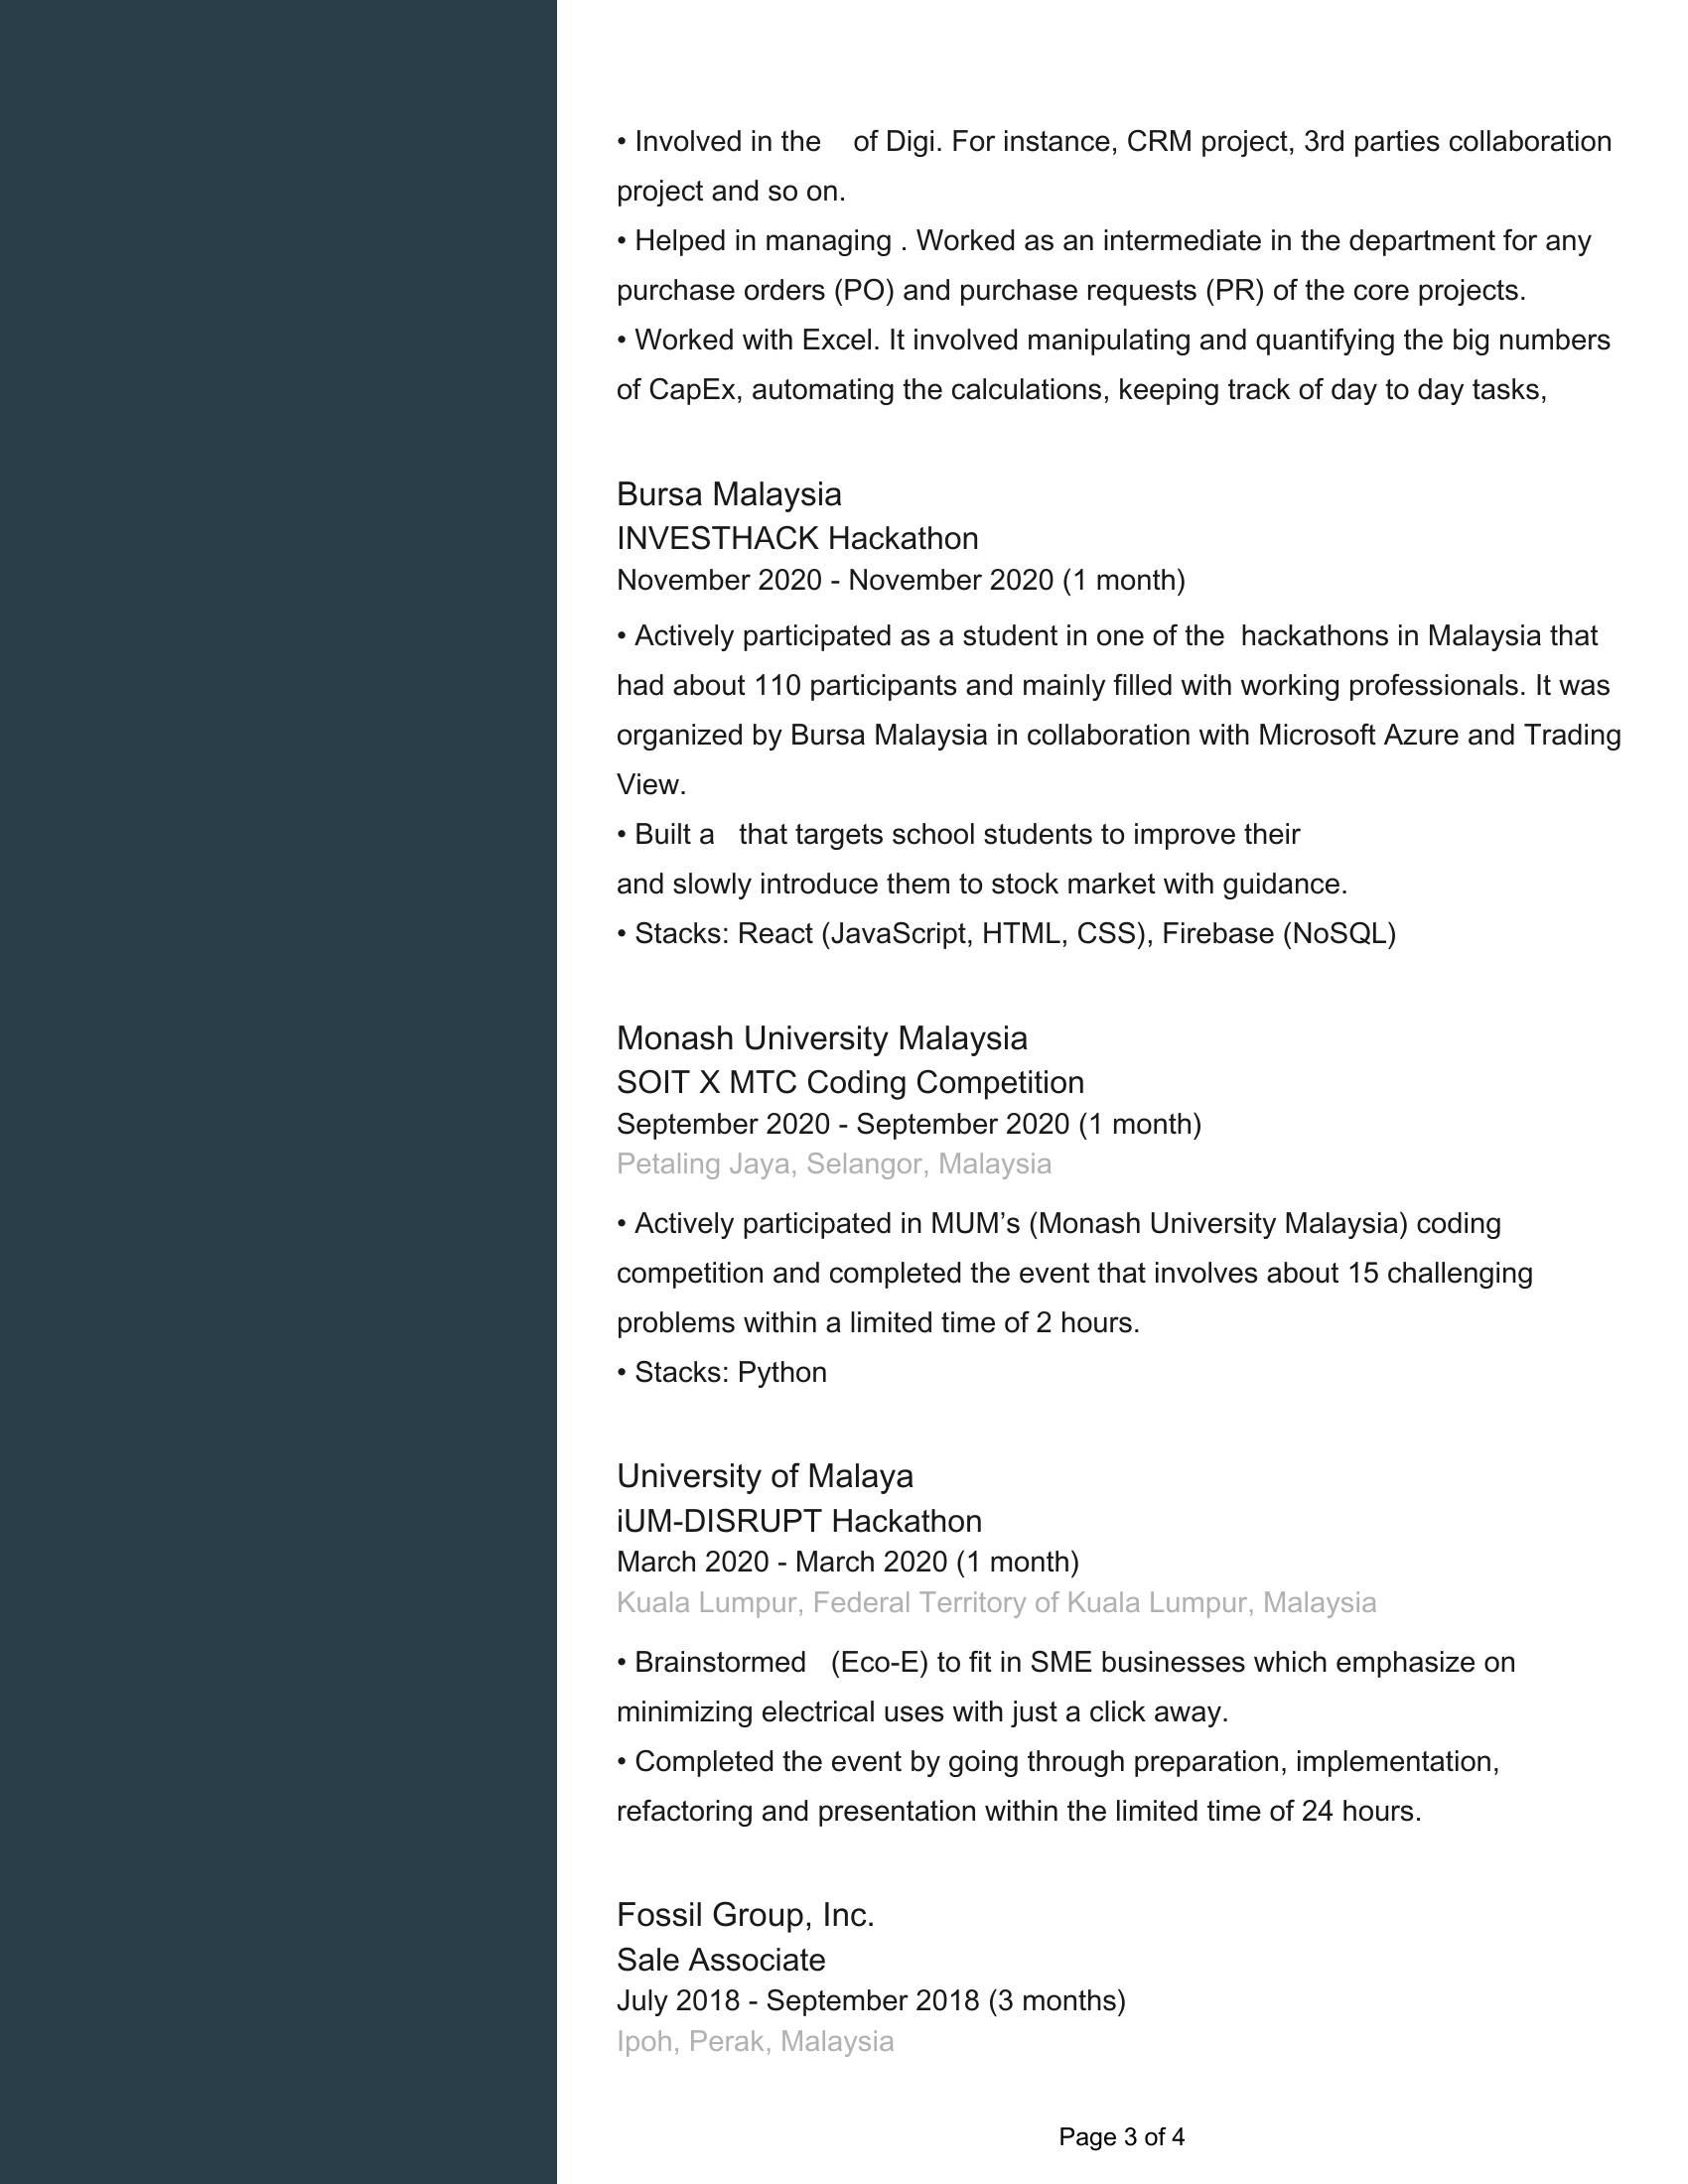

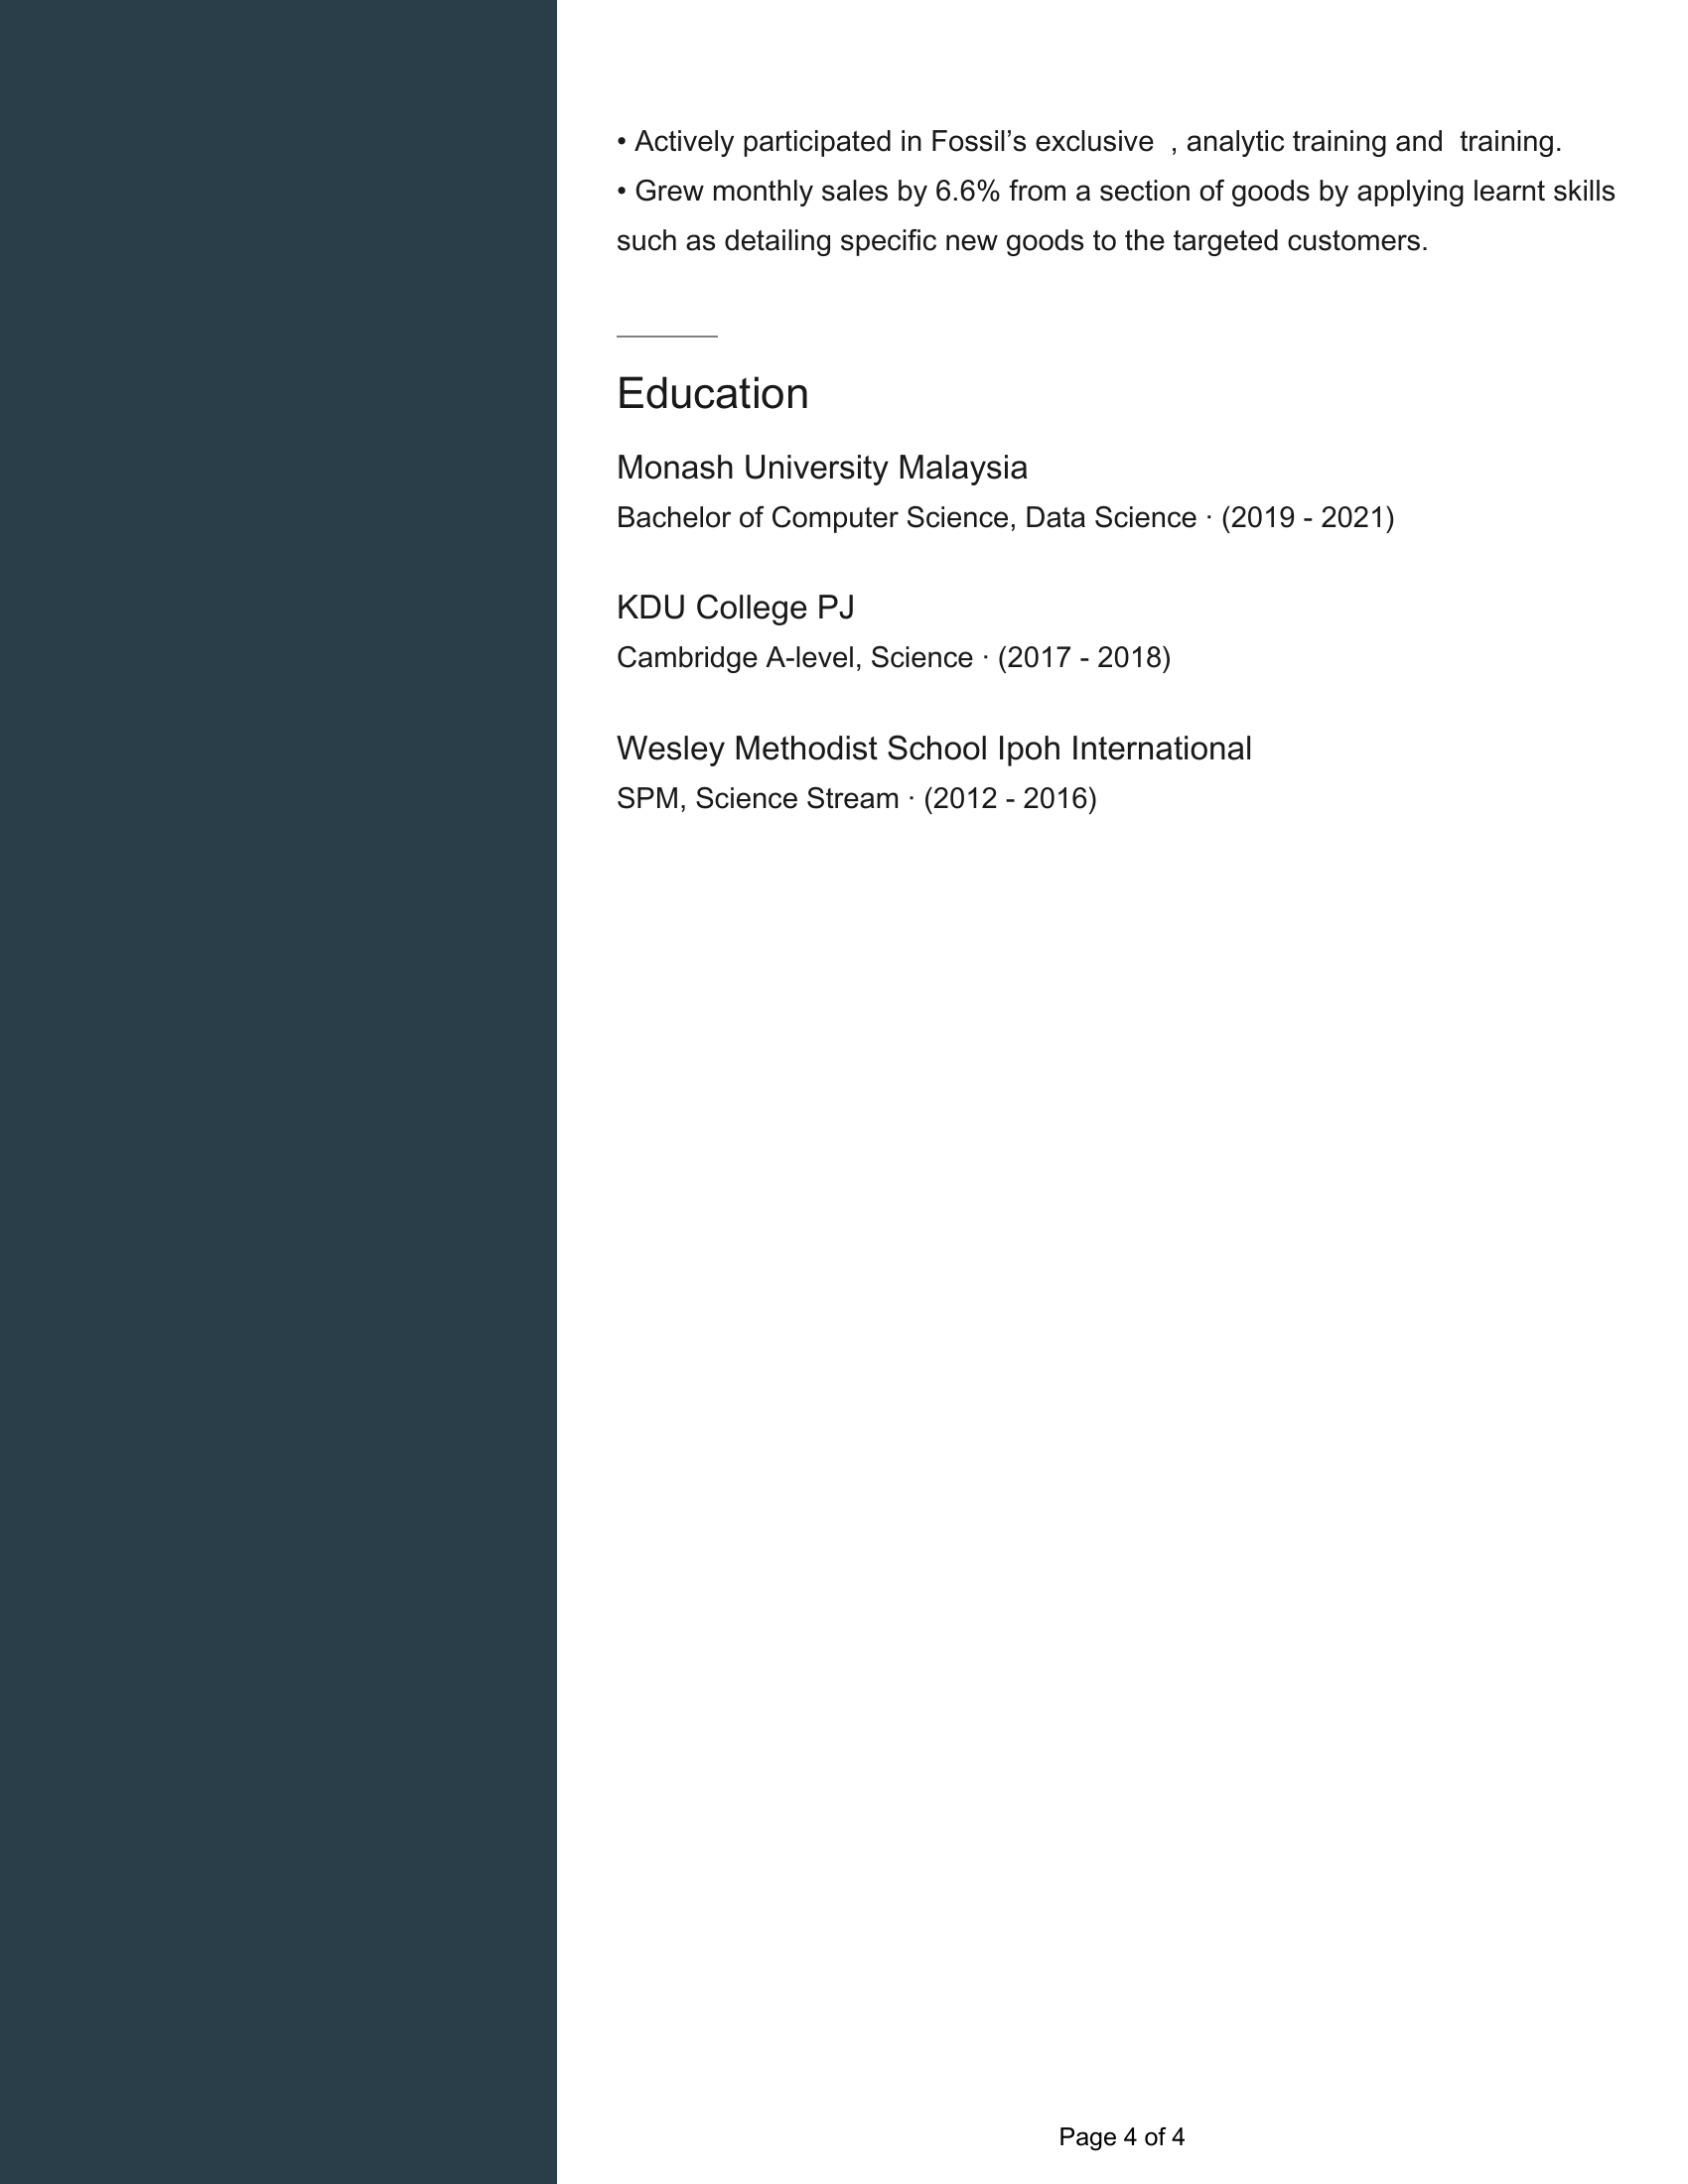

In [100]:
# Import necessary library for viewing the resume pdf scrapped
import easyocr
from pdf2image import convert_from_path
from spacy import displacy

reader = easyocr.Reader(['en'])

PDF_path = "./RawProfile/json_0000.pdf"
pages = convert_from_path(PDF_path, poppler_path = "./poppler-0.68.0/bin")

for number_of_pages in range(len(pages)):
    display(pages[number_of_pages])

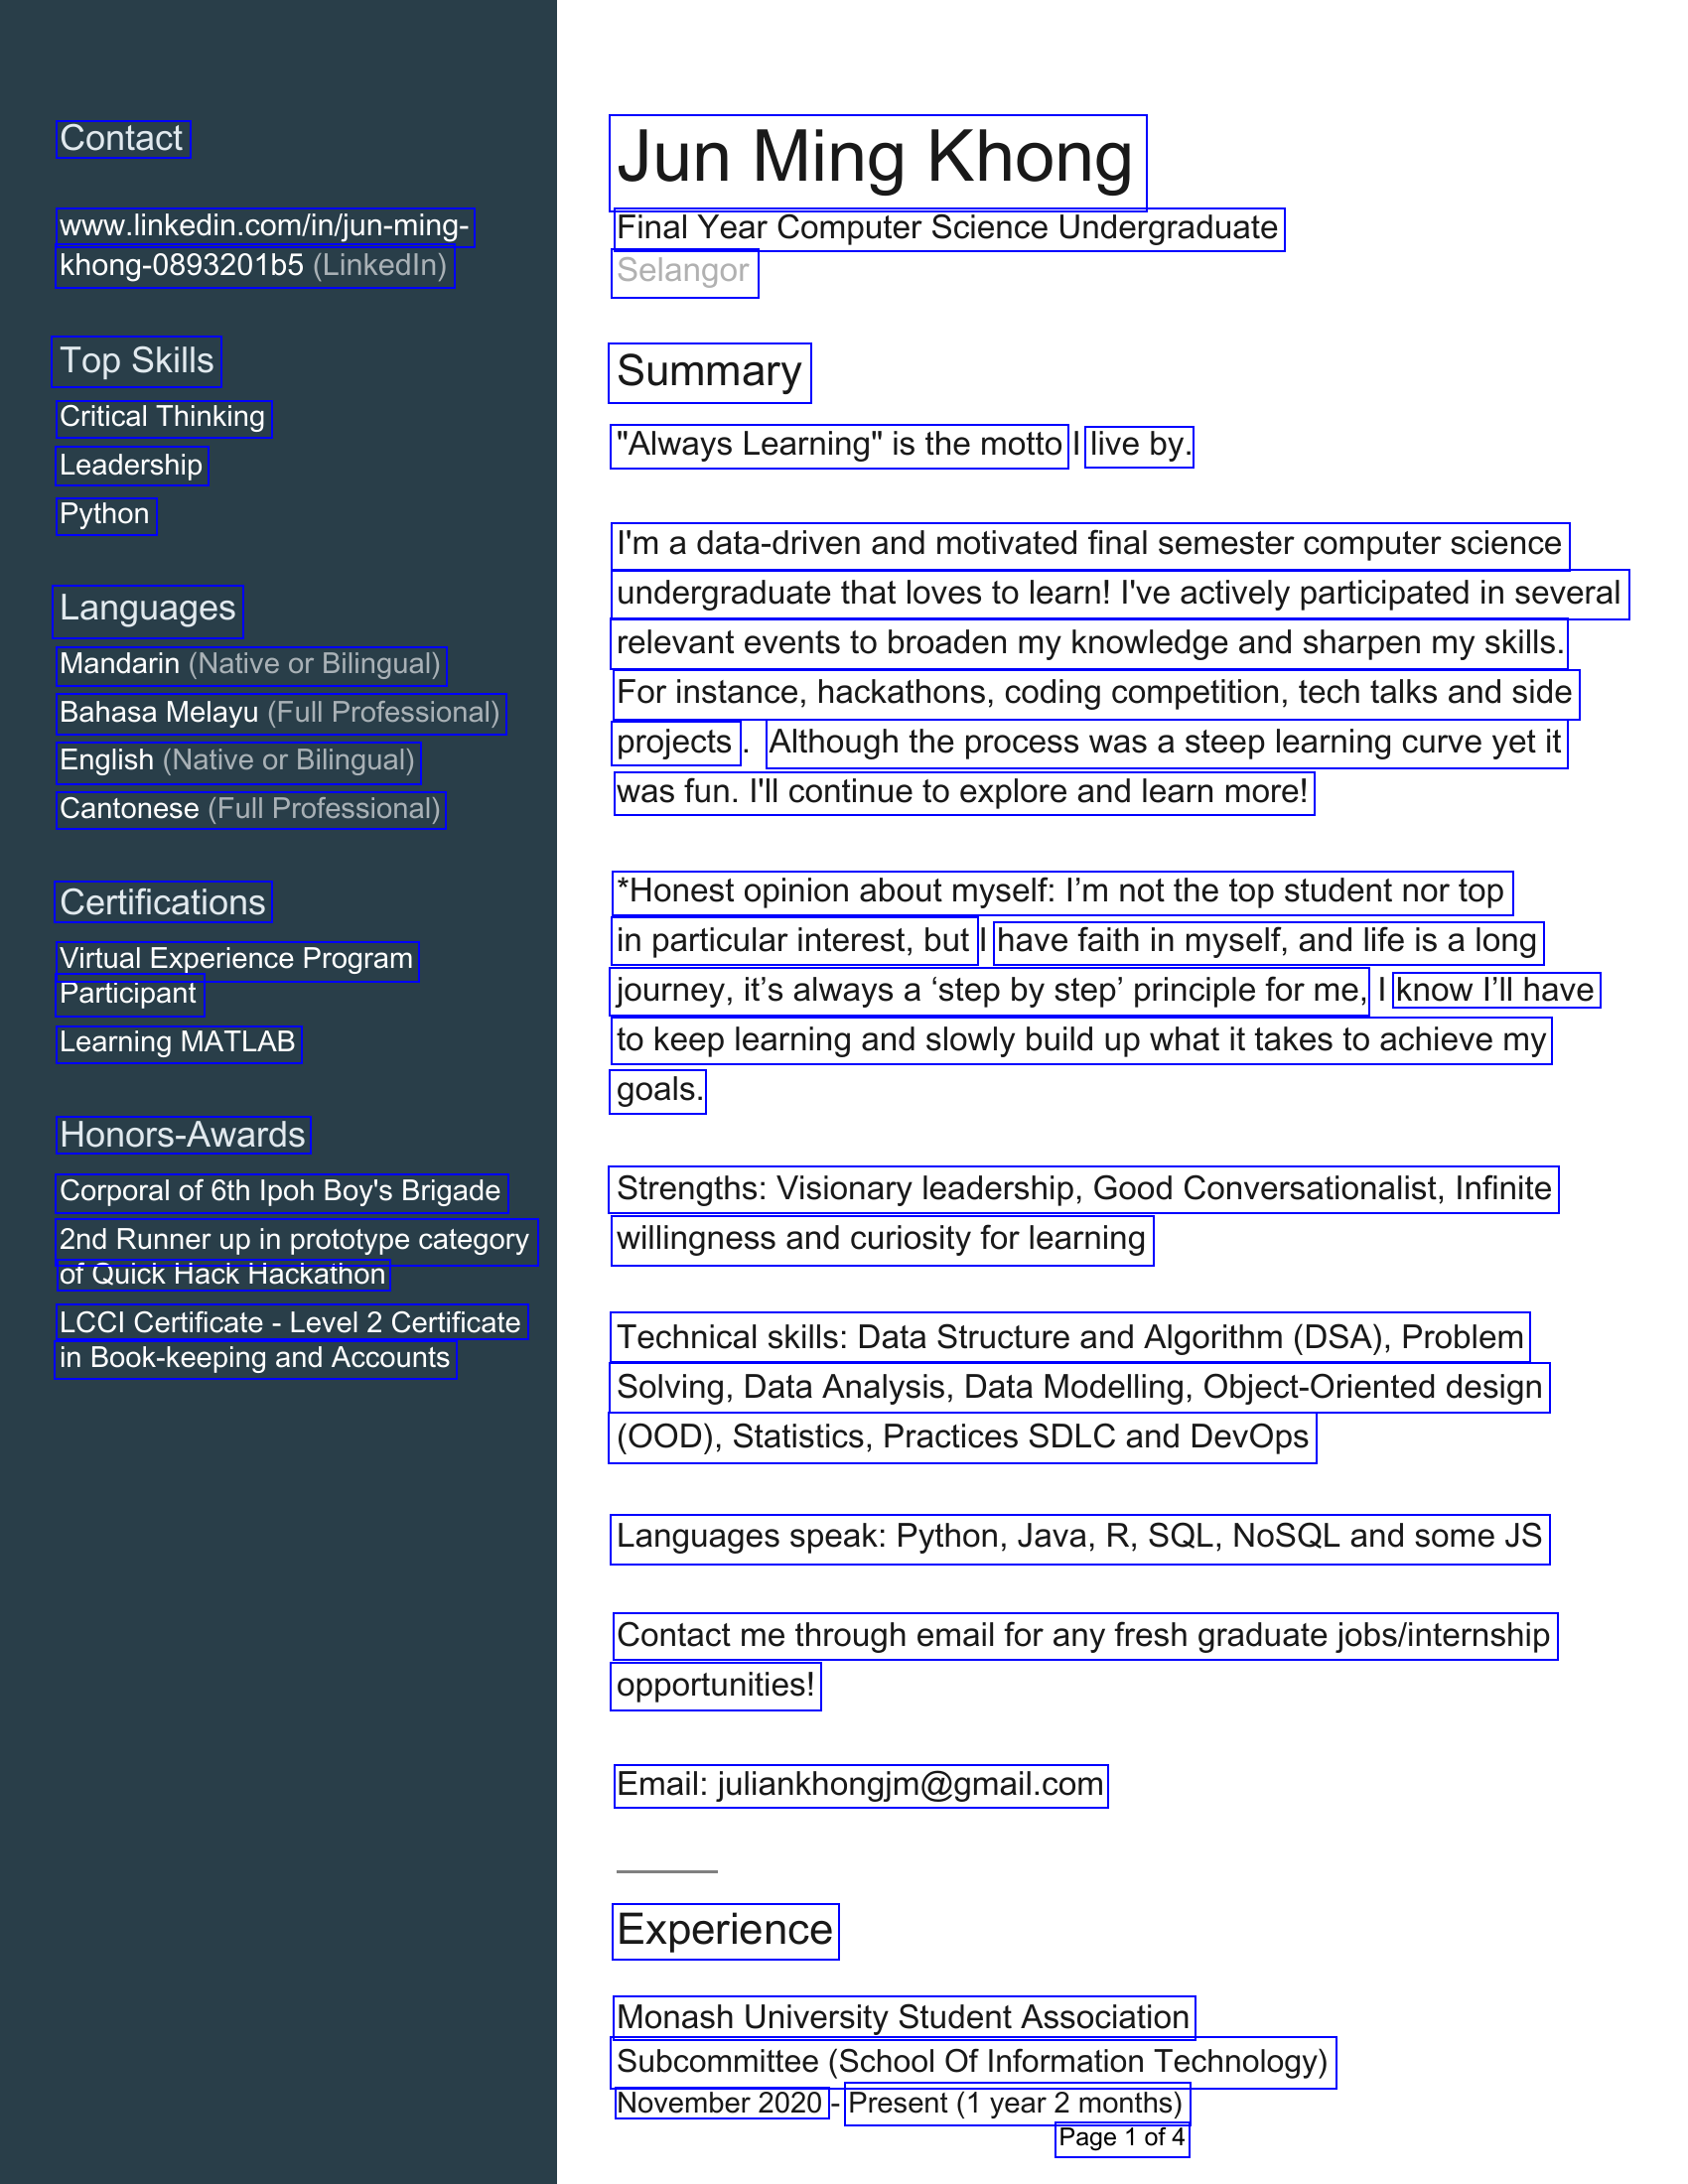

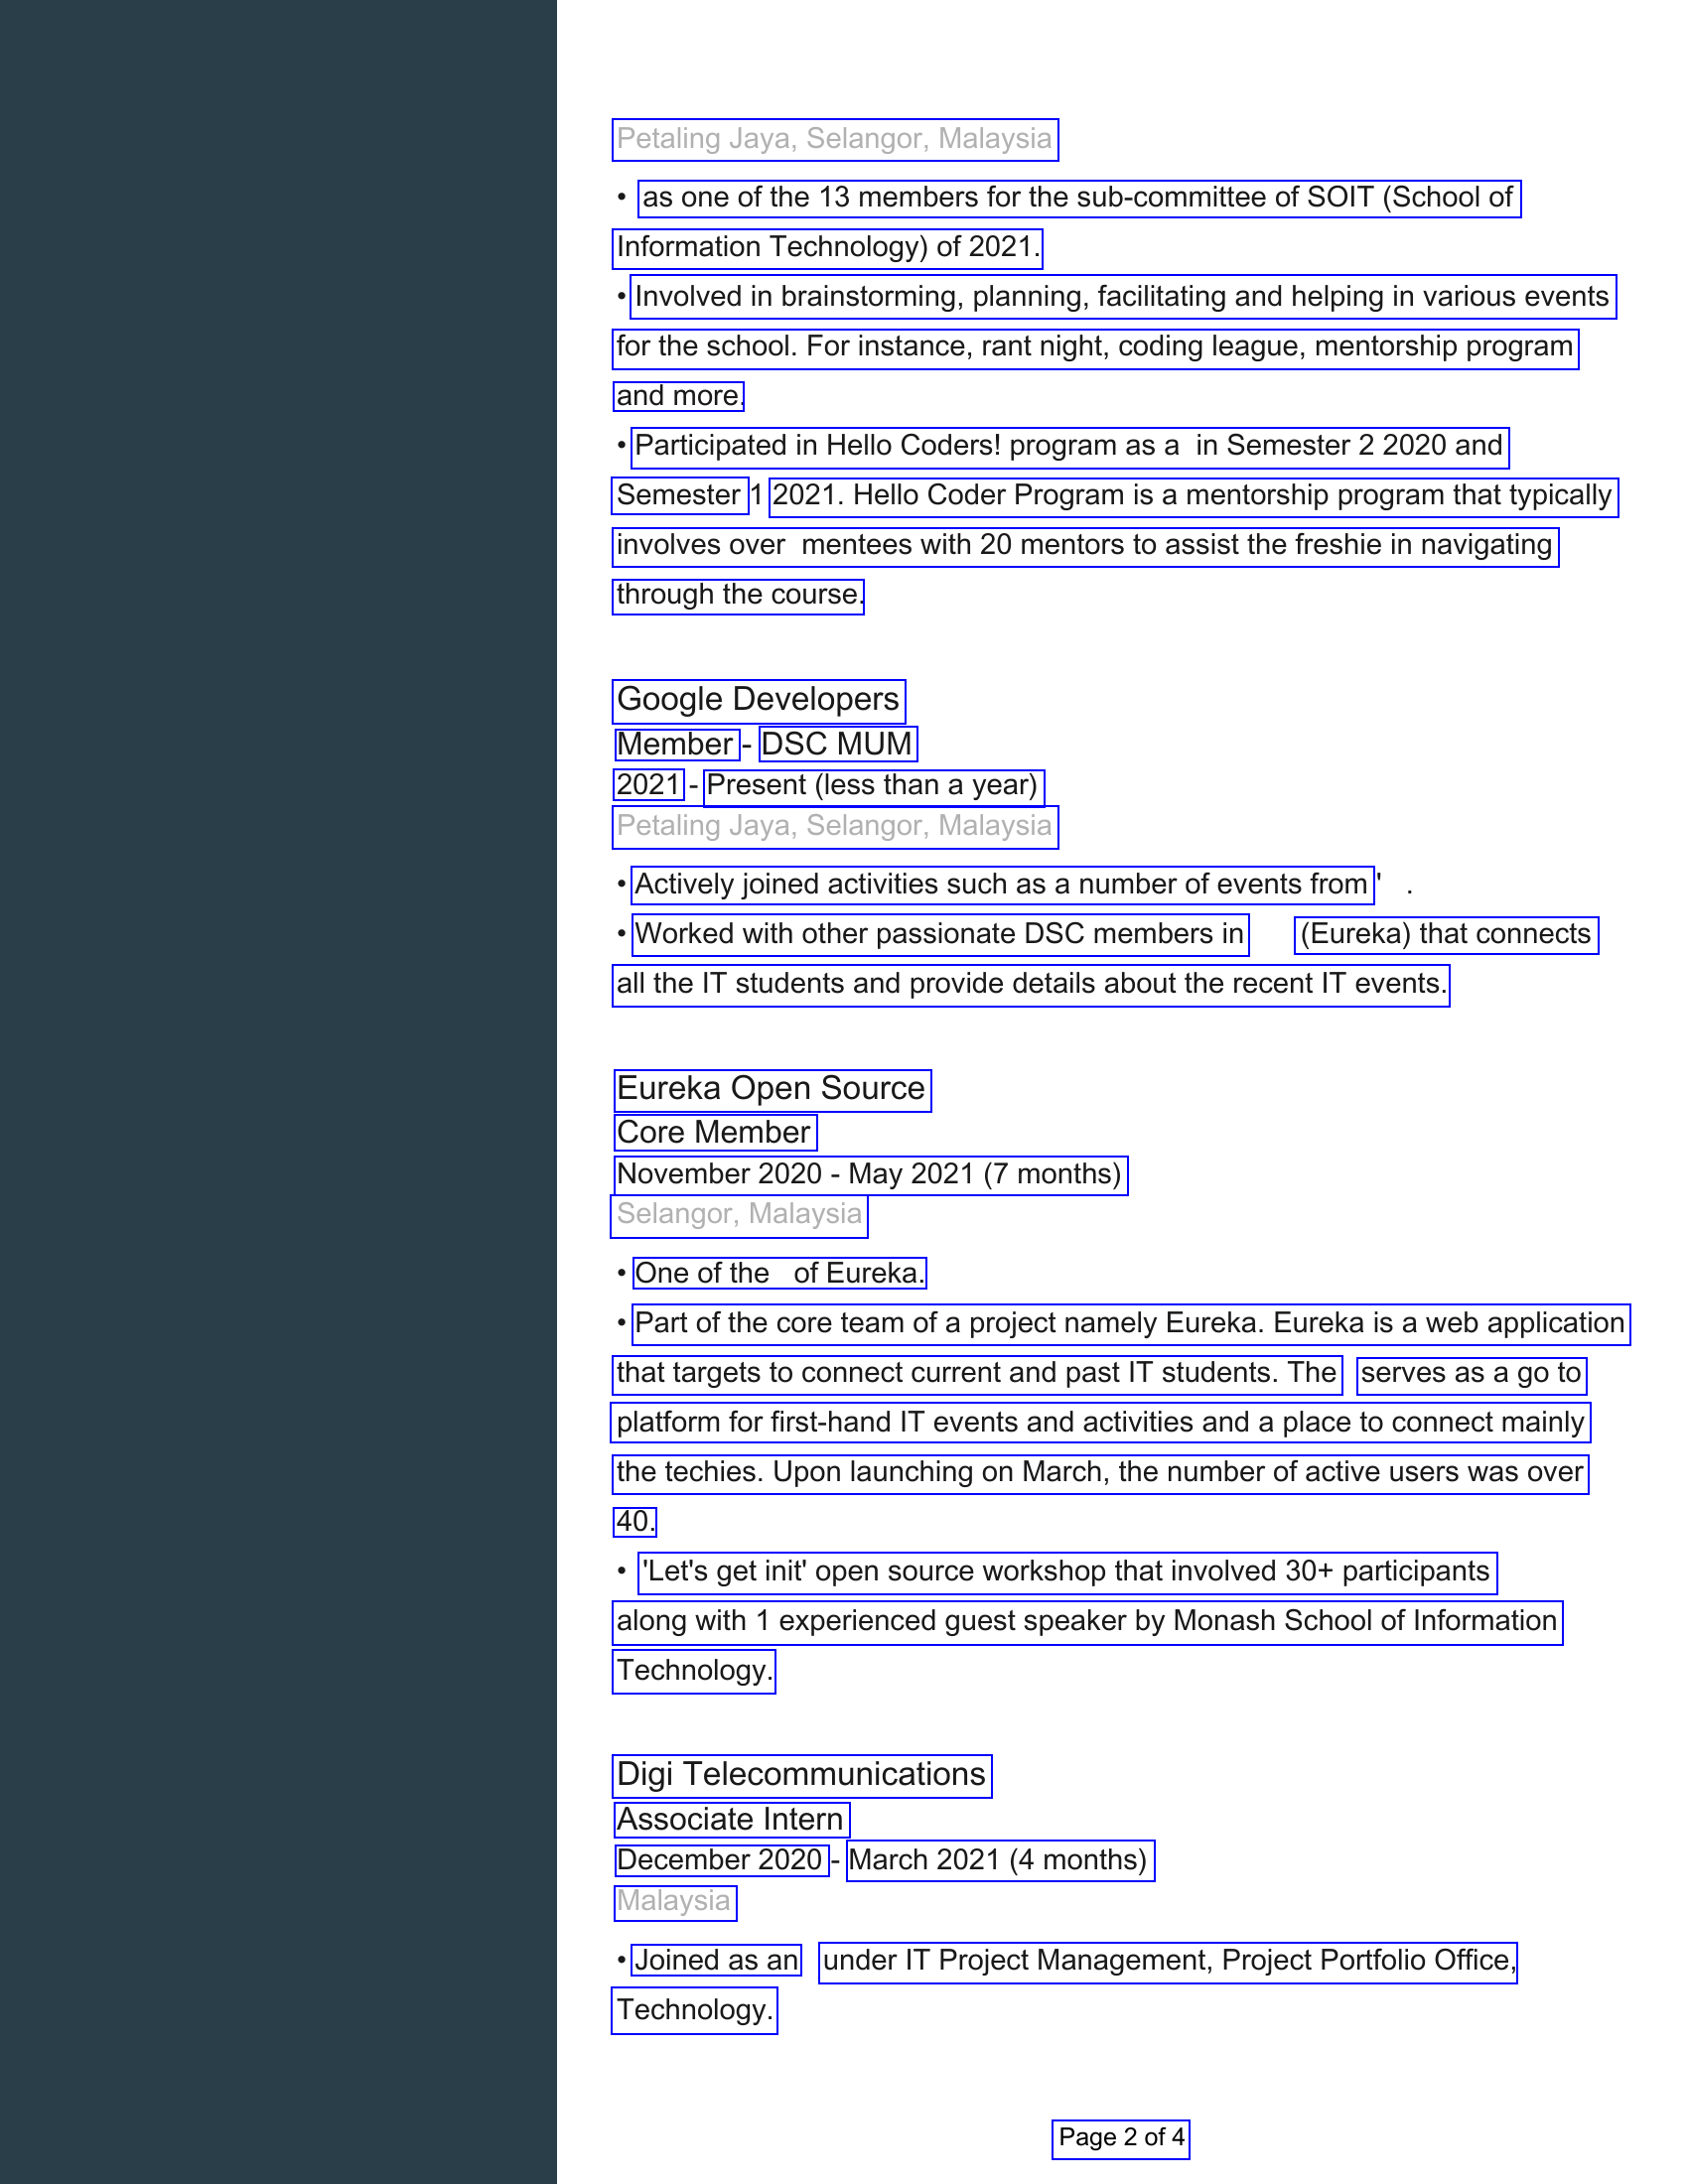

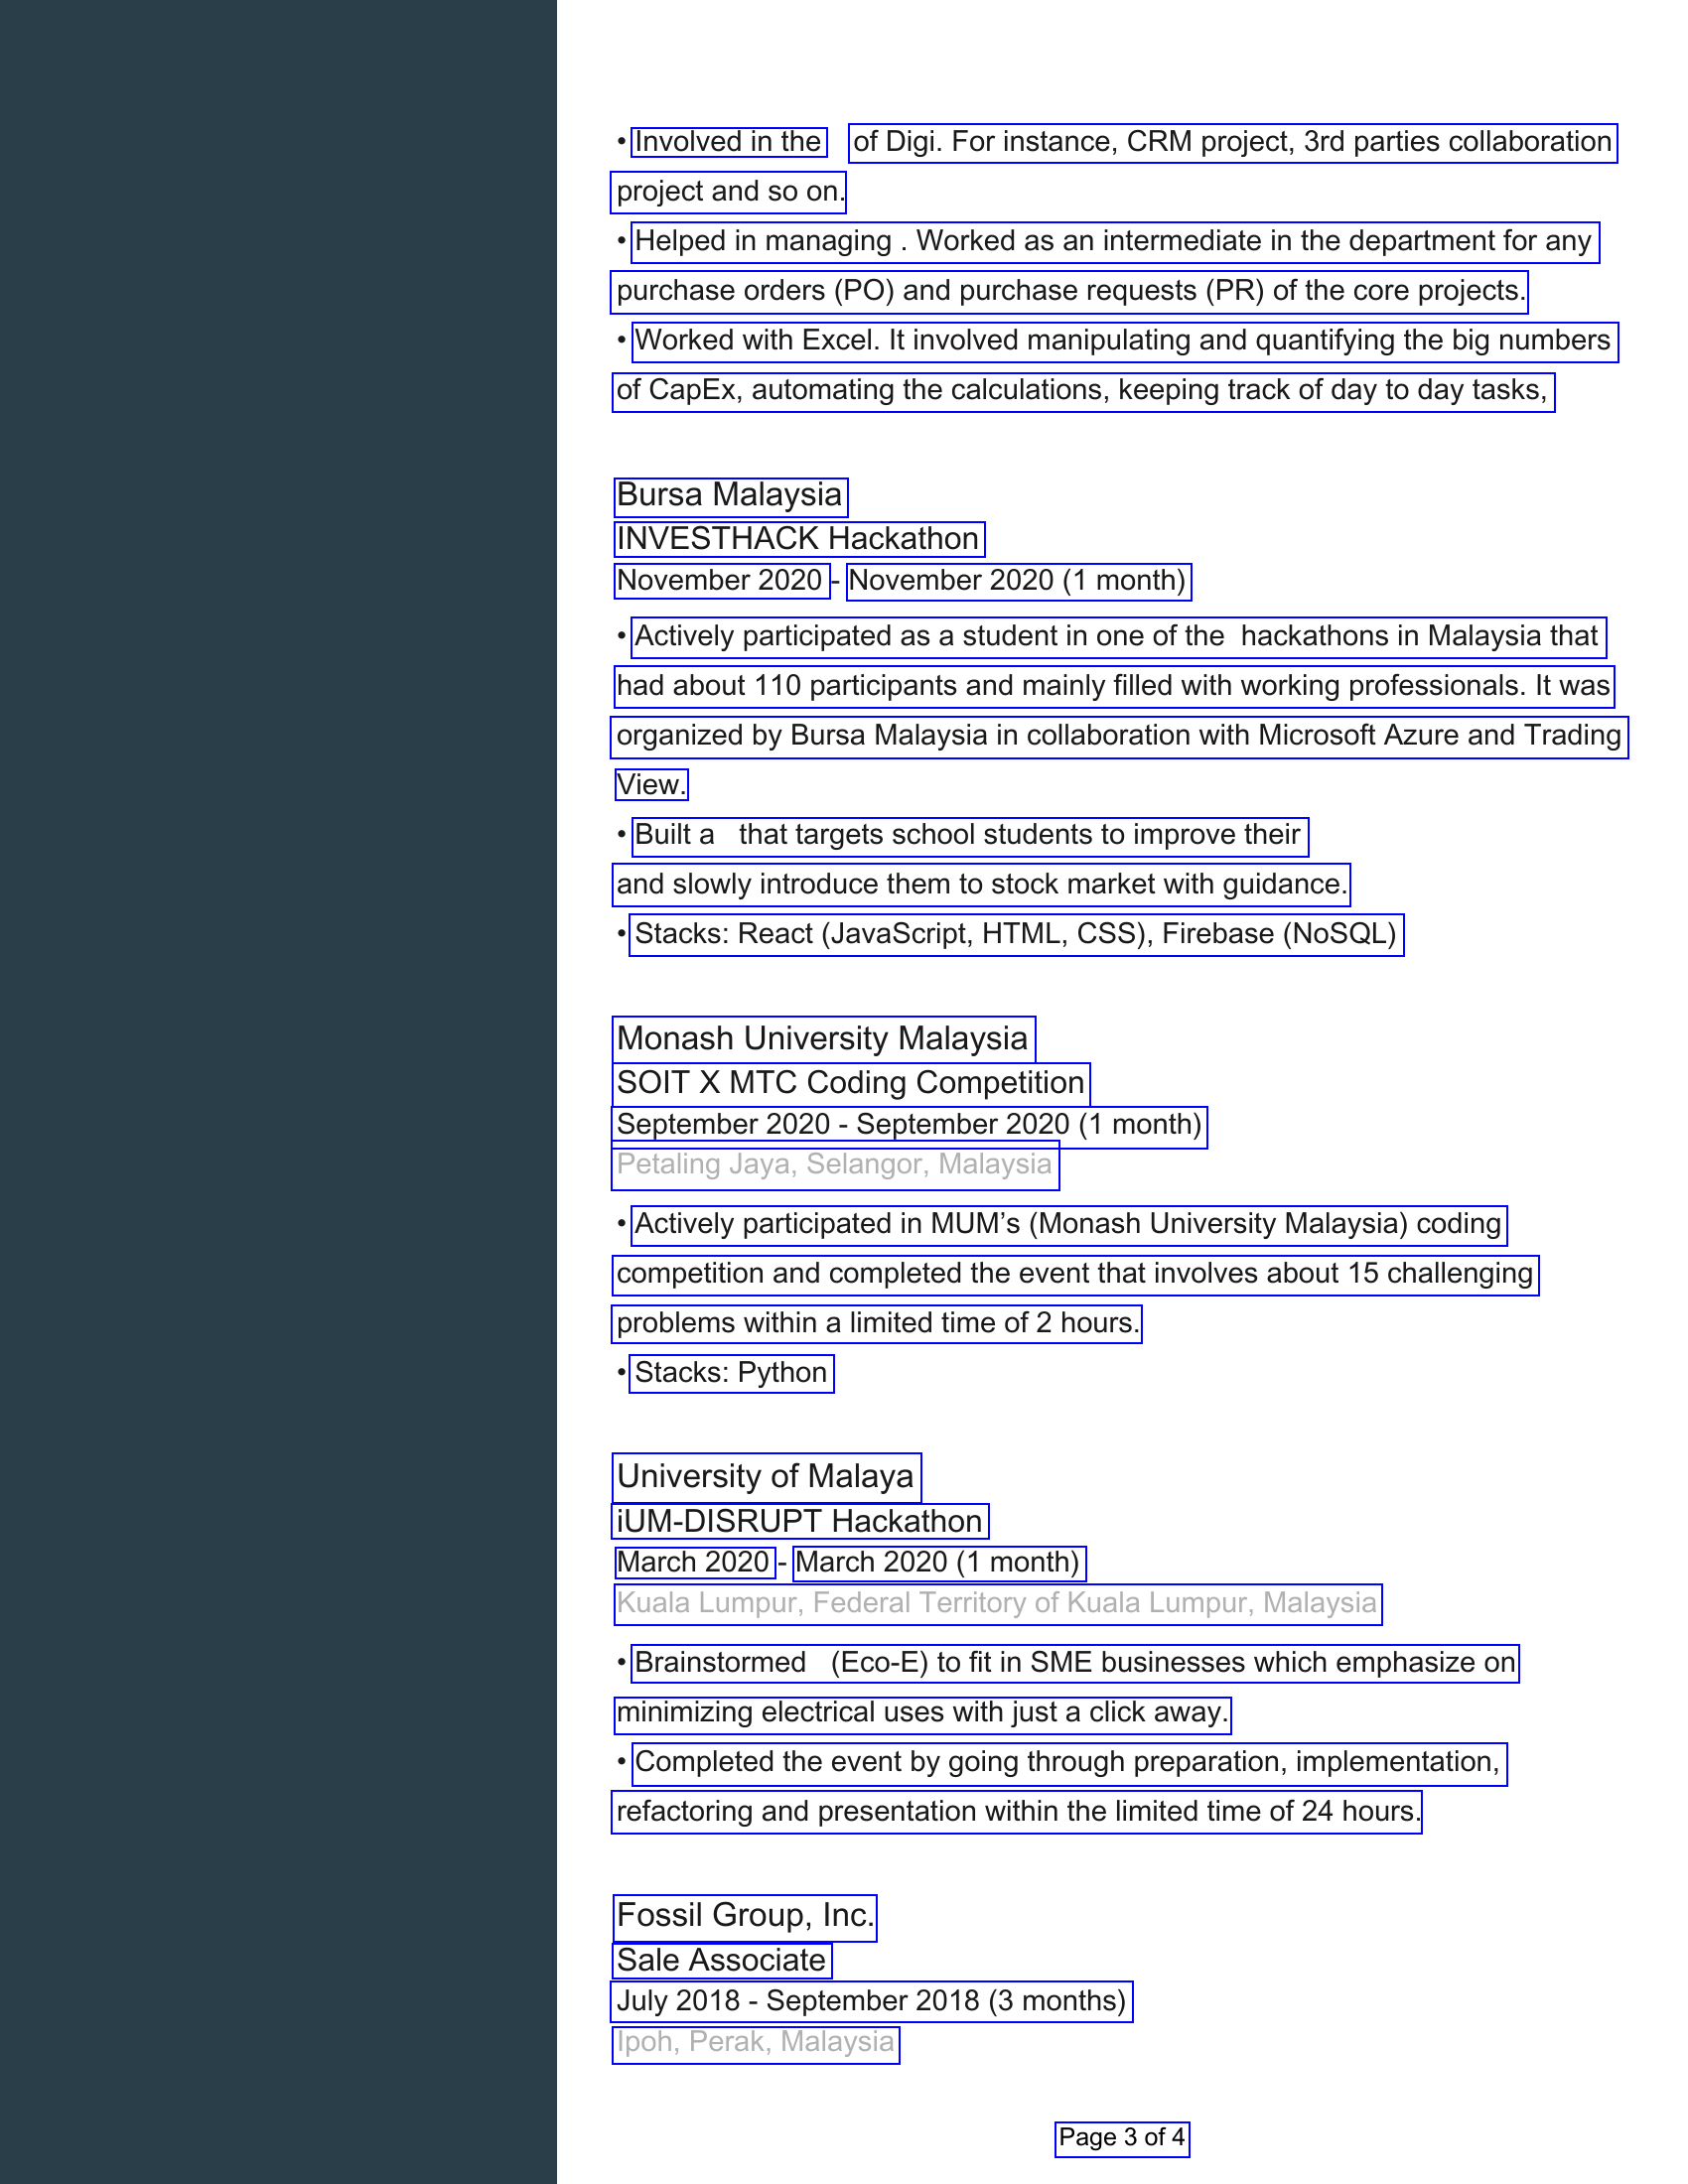

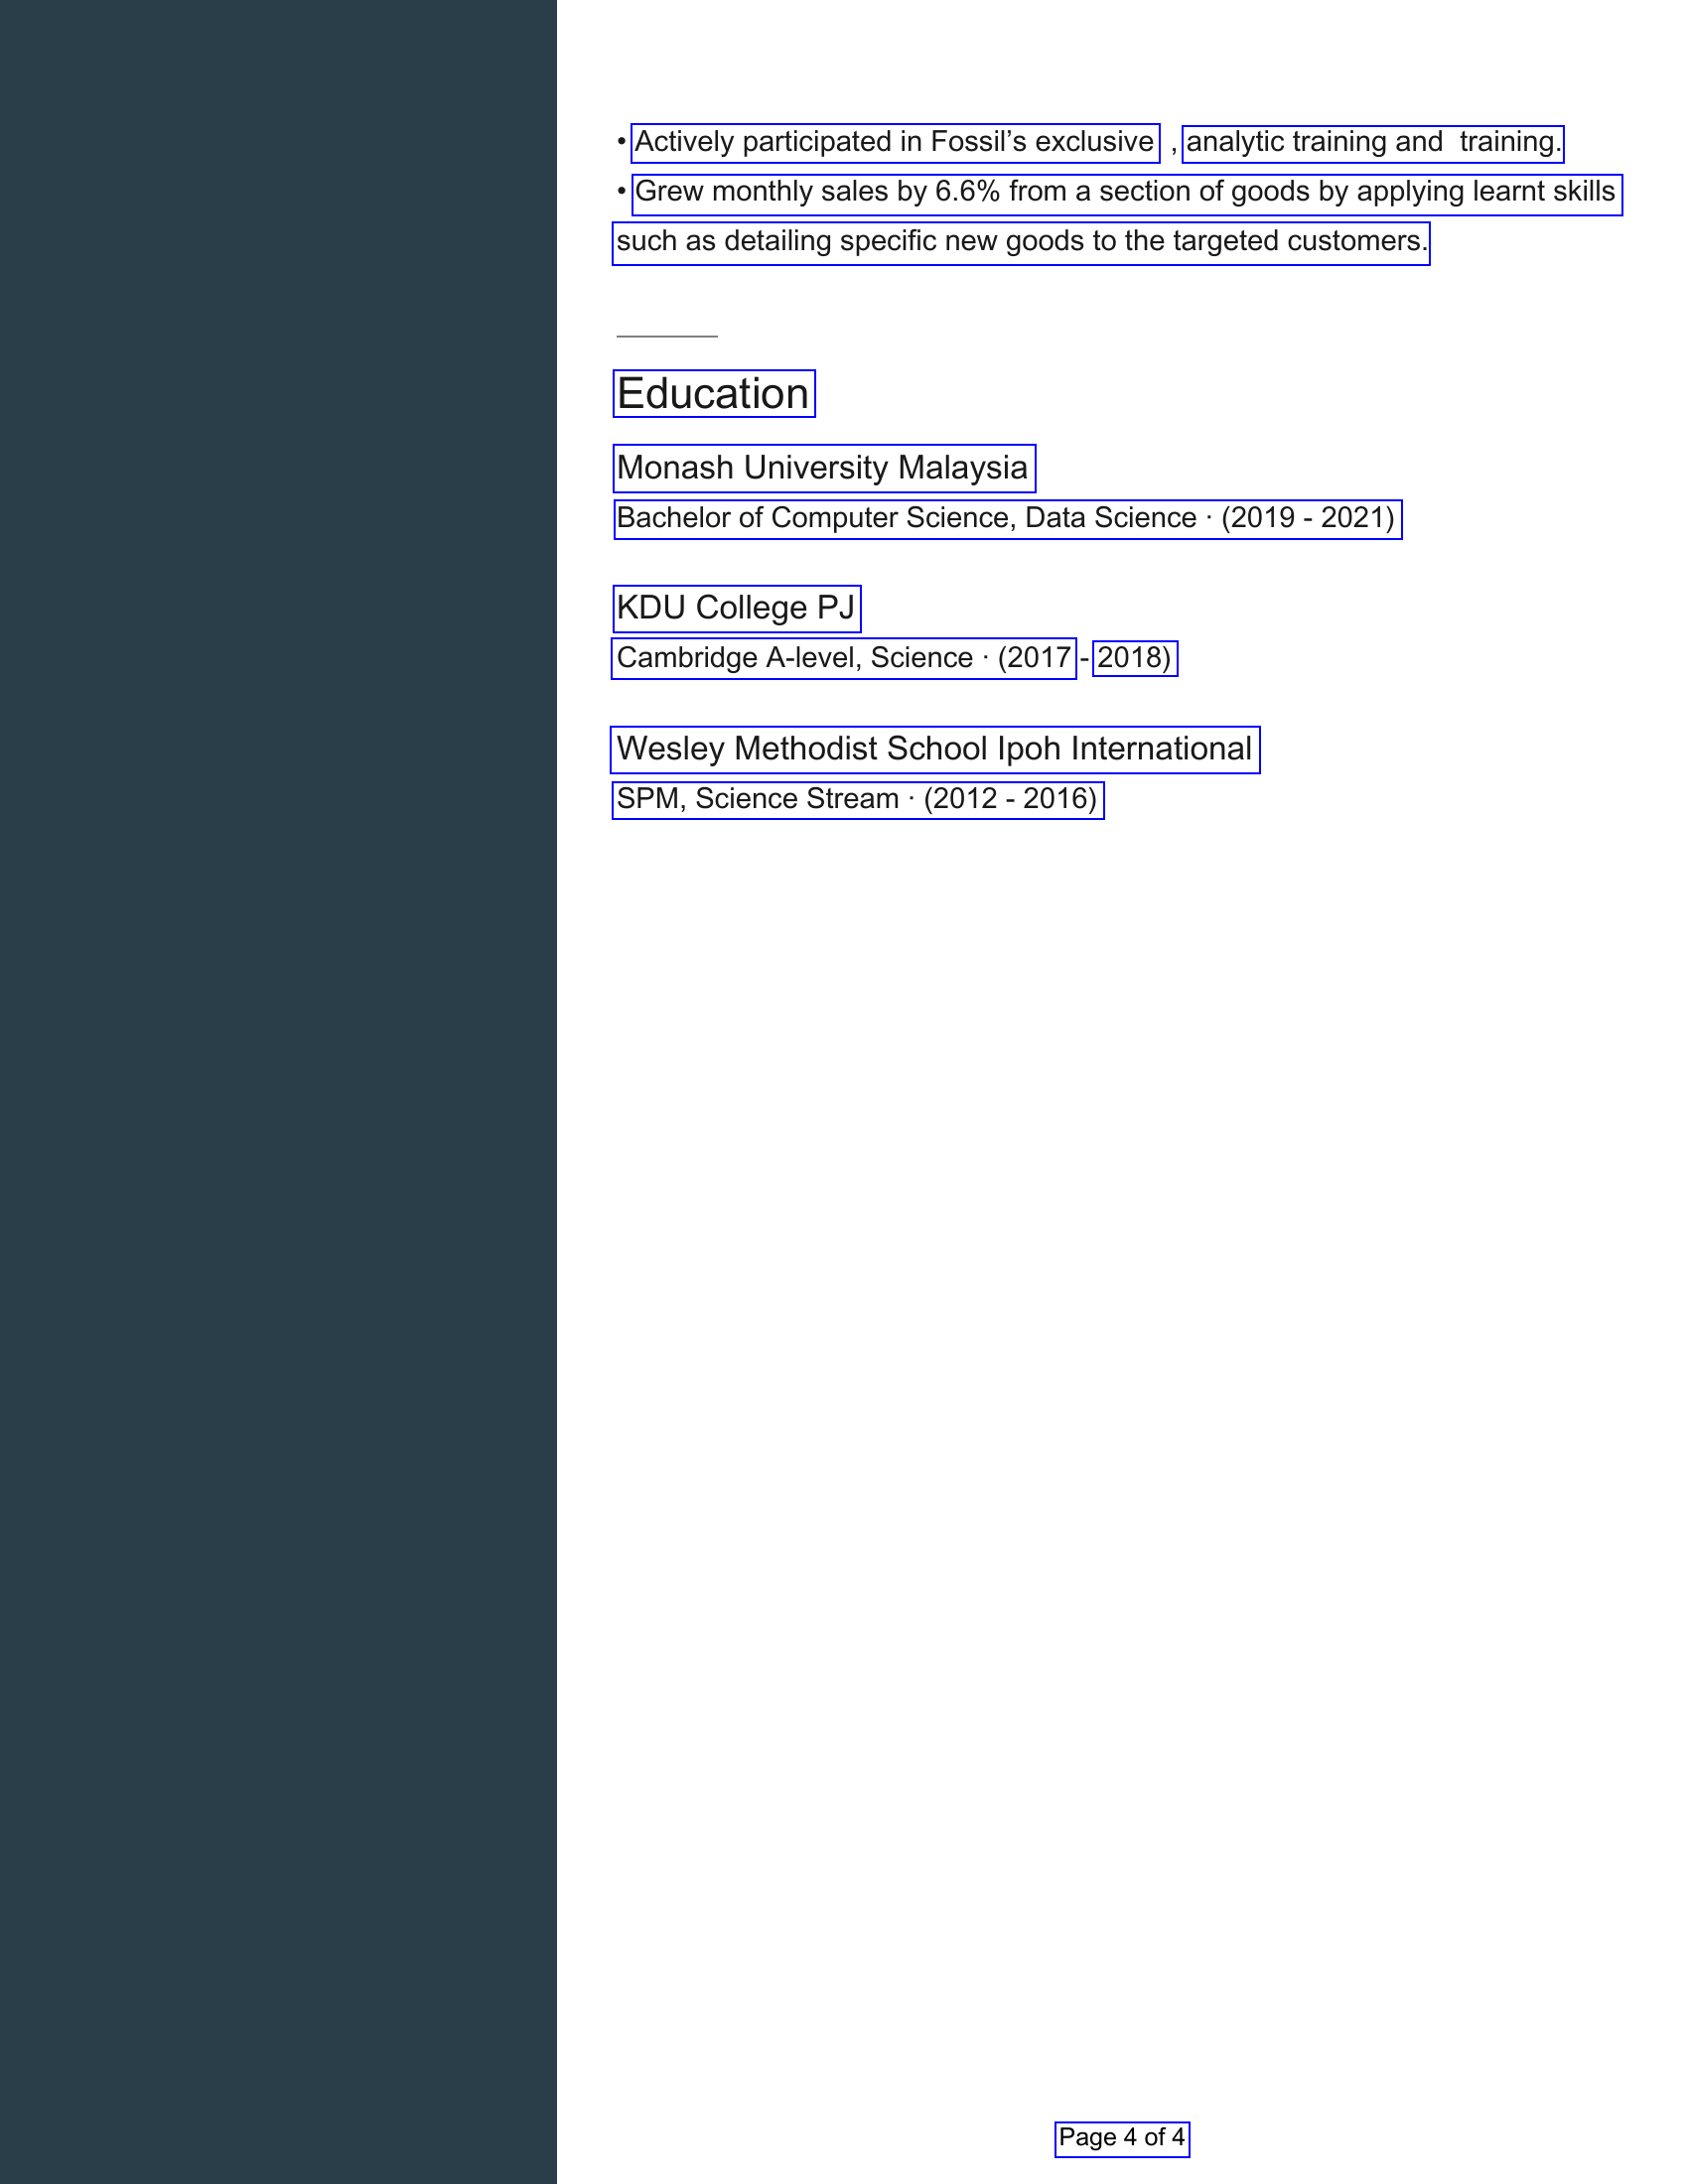

In [101]:
# Use easyOCR to read the text in the resume pdf
# Draw boxes around the text in the resume pdf

from PIL import ImageDraw
from IPython.display import display, Image

cummulative_array = np.array([])
current_array = [0 for i in range(len(pages))]

for number_of_pages in range(len(pages)):
    current_array[number_of_pages] = reader.readtext(np.array(pages[number_of_pages]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder="beamsearch", beamWidth=10)


def draw_boxes(image, bound, color='blue',width=2):
    draw = ImageDraw.Draw(image)
    for item in bound:
        p0,p1,p2,p3 = item[0]
        draw.line([*p0,*p1,*p2,*p3,*p0], fill=color, width=width)
    return image

for number_of_pages in range(len(pages)):
    display(draw_boxes(pages[number_of_pages], current_array[number_of_pages]))

In [102]:
# Have a look on the resume text
# Text is not aligned correctly

text=''
for number_of_pages in range(len(pages)):
    for i in range(len(current_array[number_of_pages])):
        text = text + current_array[number_of_pages][i][1] + '\n'

print(text)

Contact
Jun Ming Khong
www linkedin comlinljun-ming-
Final Year Computer Science Undergraduate
khong-0893201b5 (Linkedln)
Selangor
Top Skills
Summary
Critical Thinking
Leadership
"Always Learning" is the motto
live by:
Python
Im a data-driven and motivated final semester computer science
Languages
undergraduate that loves to learn! ['ve actively participated in several
Mandarin (Native or Bilingual)
relevant events to broaden my knowledge and sharpen my skills.
Bahasa Melayu (Full Professional)
For instance, hackathons, coding competition, tech talks and side
English (Native or Bilingual)
projects
Although the process was a steep learning curve yet it
Cantonese (Ful Professional)
was fun: IIl continue to explore and learn morel
Certifications
*Honest opinion about myself: Im not the top student nor top
Virtual Experience Program
in particular interest; but
have faith in myself, and life is a long
Participant
journey, it's always a 'step by step' principle for me,
know |'Il have
Learnin

In [103]:
# This is to try to implement the pre-trained spacy NER on the resume text
# The result is not good and hence we will be required to do custom Named Entity Recognition

import spacy

NER = spacy.load("en_core_web_sm")
NERtext= NER(text)
displacy.render(NERtext,style="ent",jupyter=True)

# Split pdf to cropped images

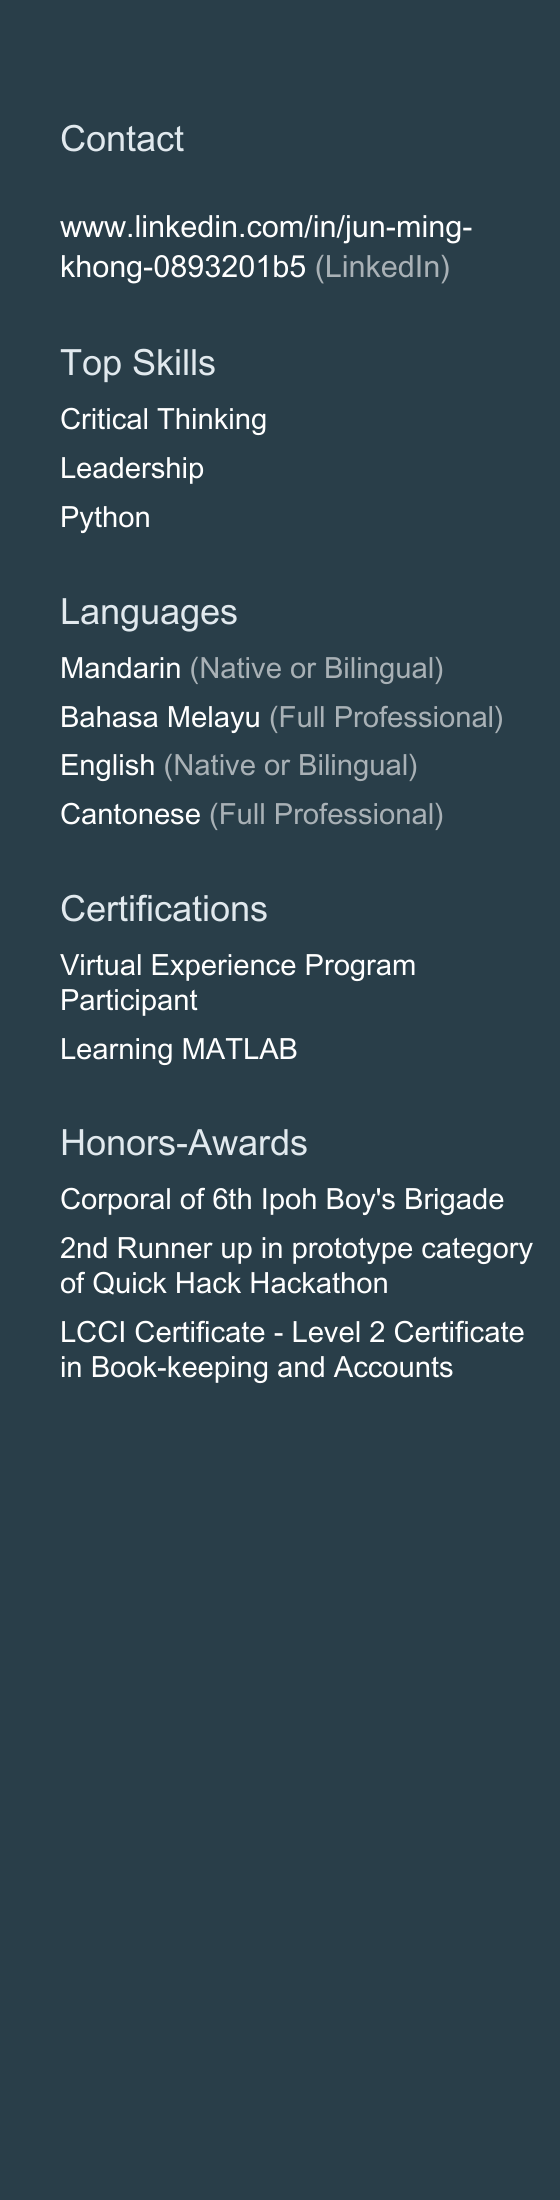

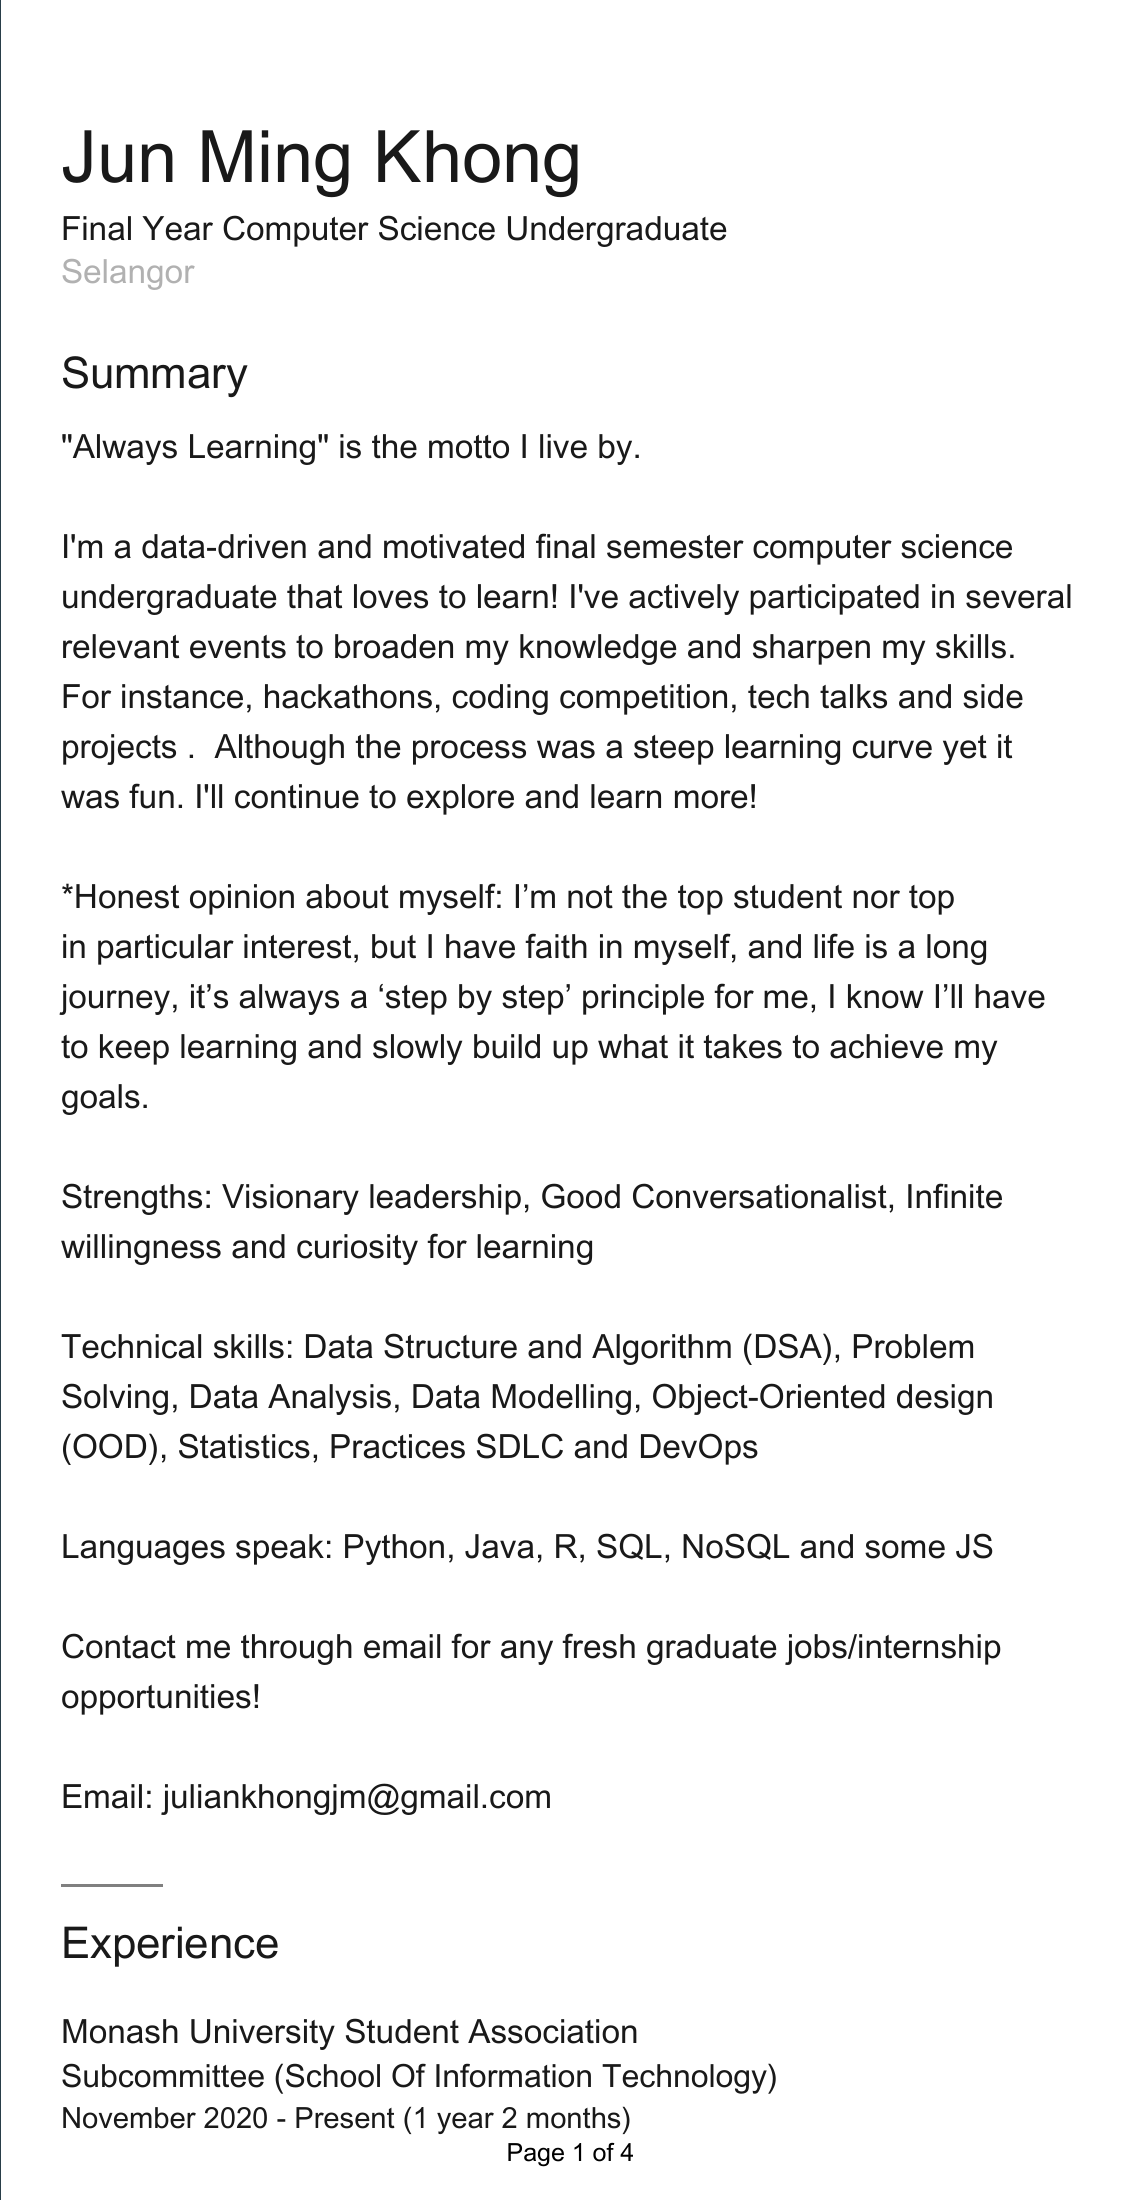

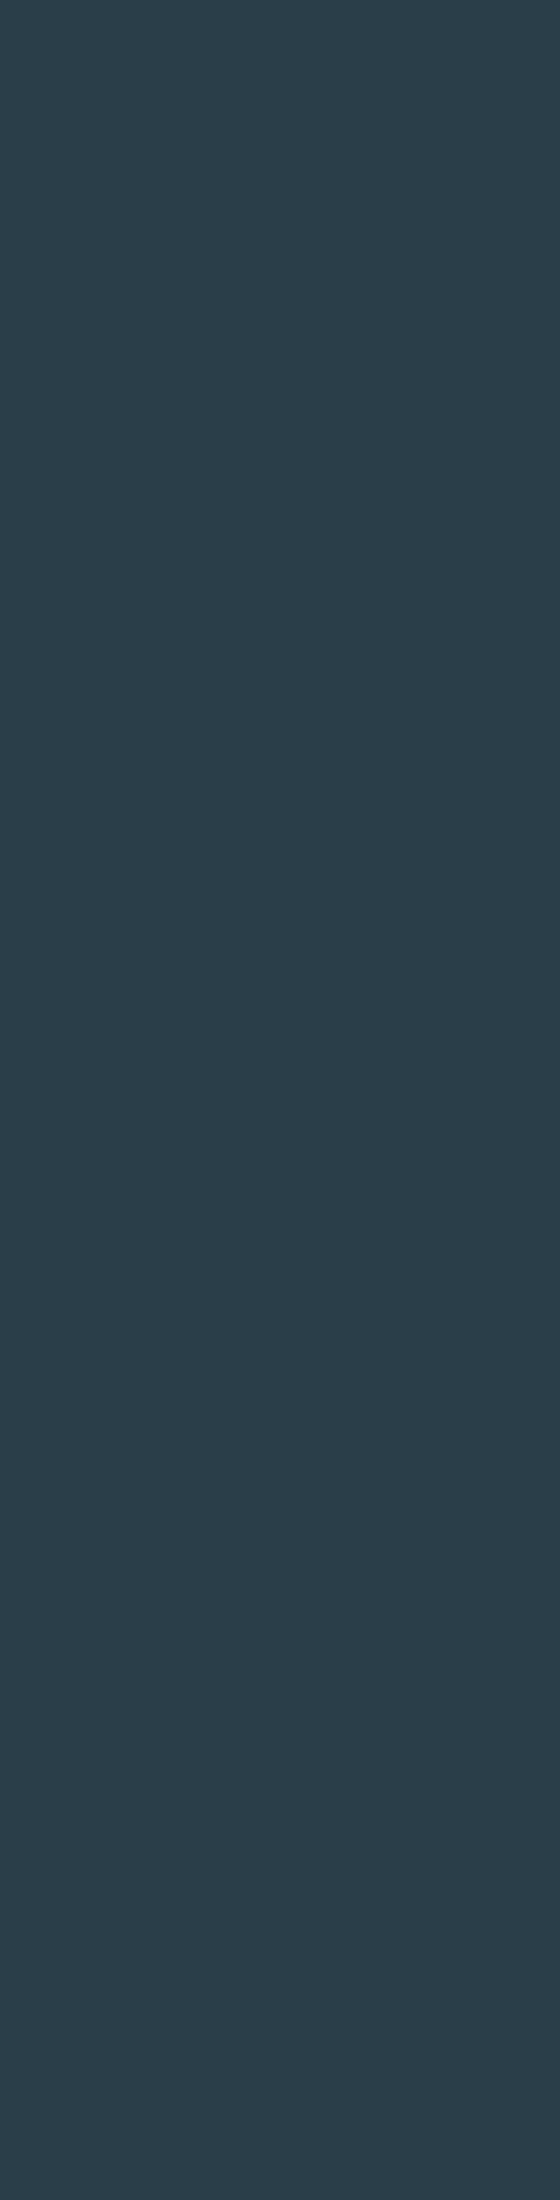

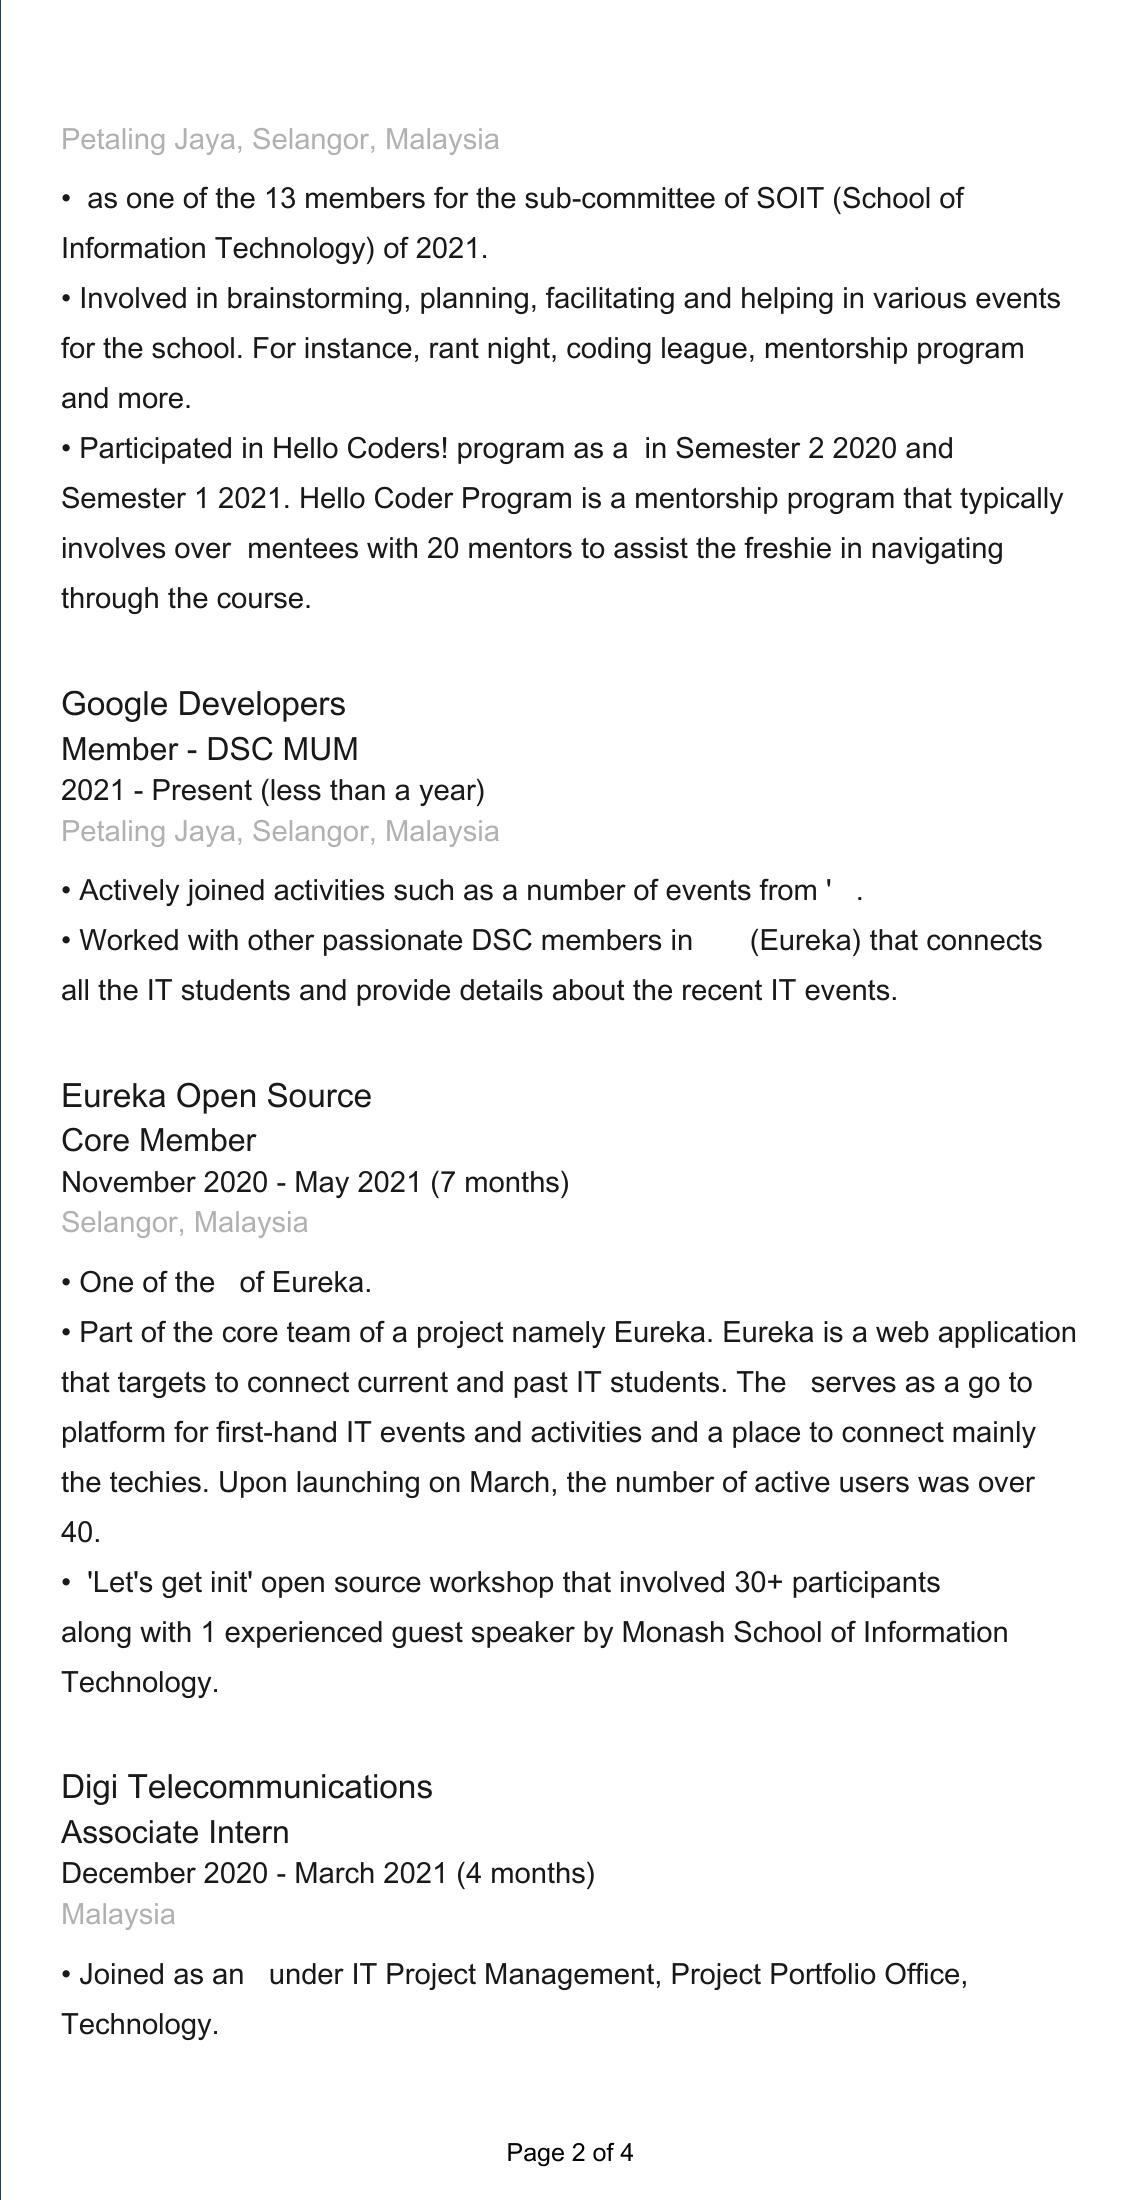

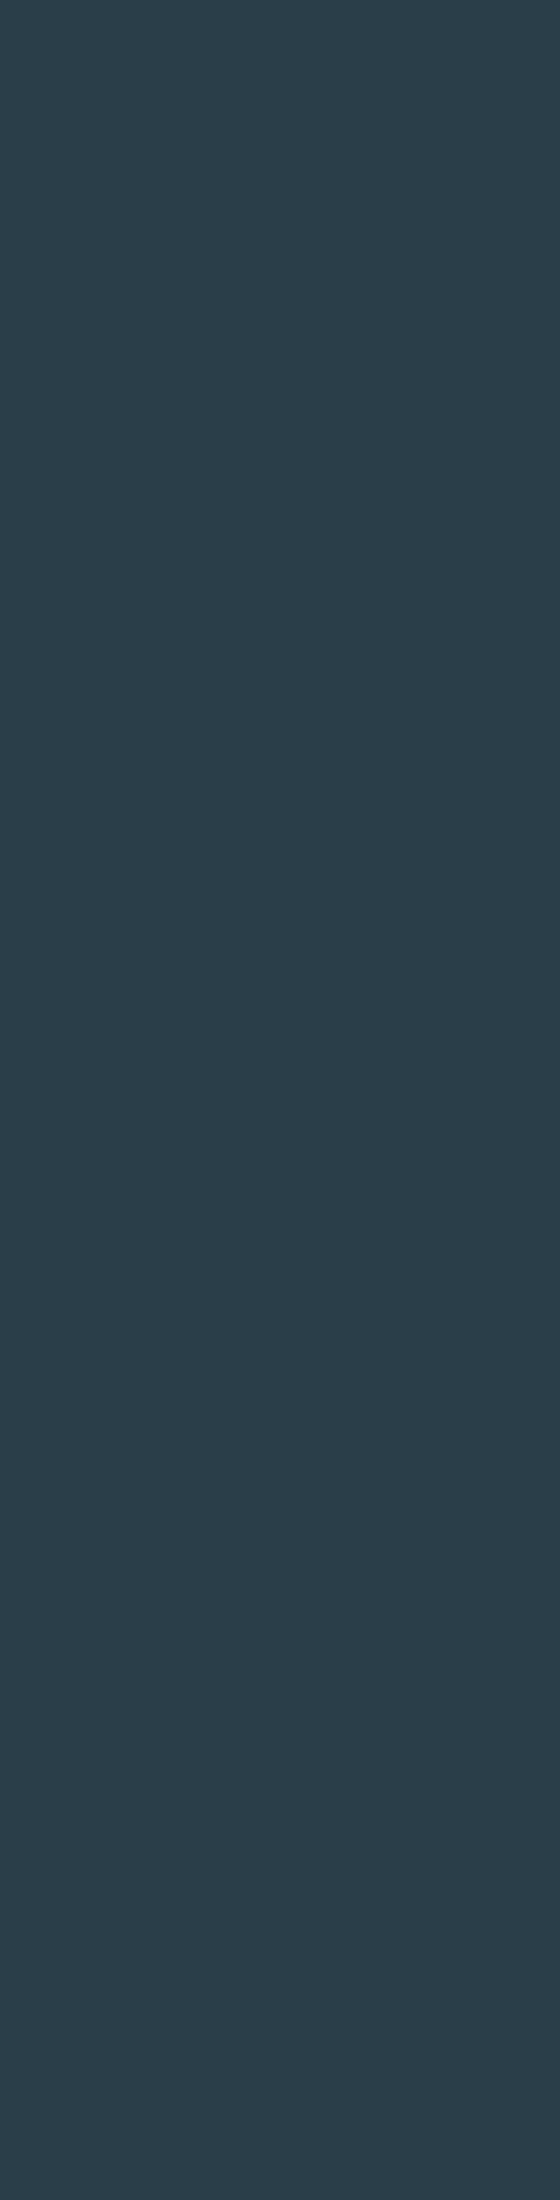

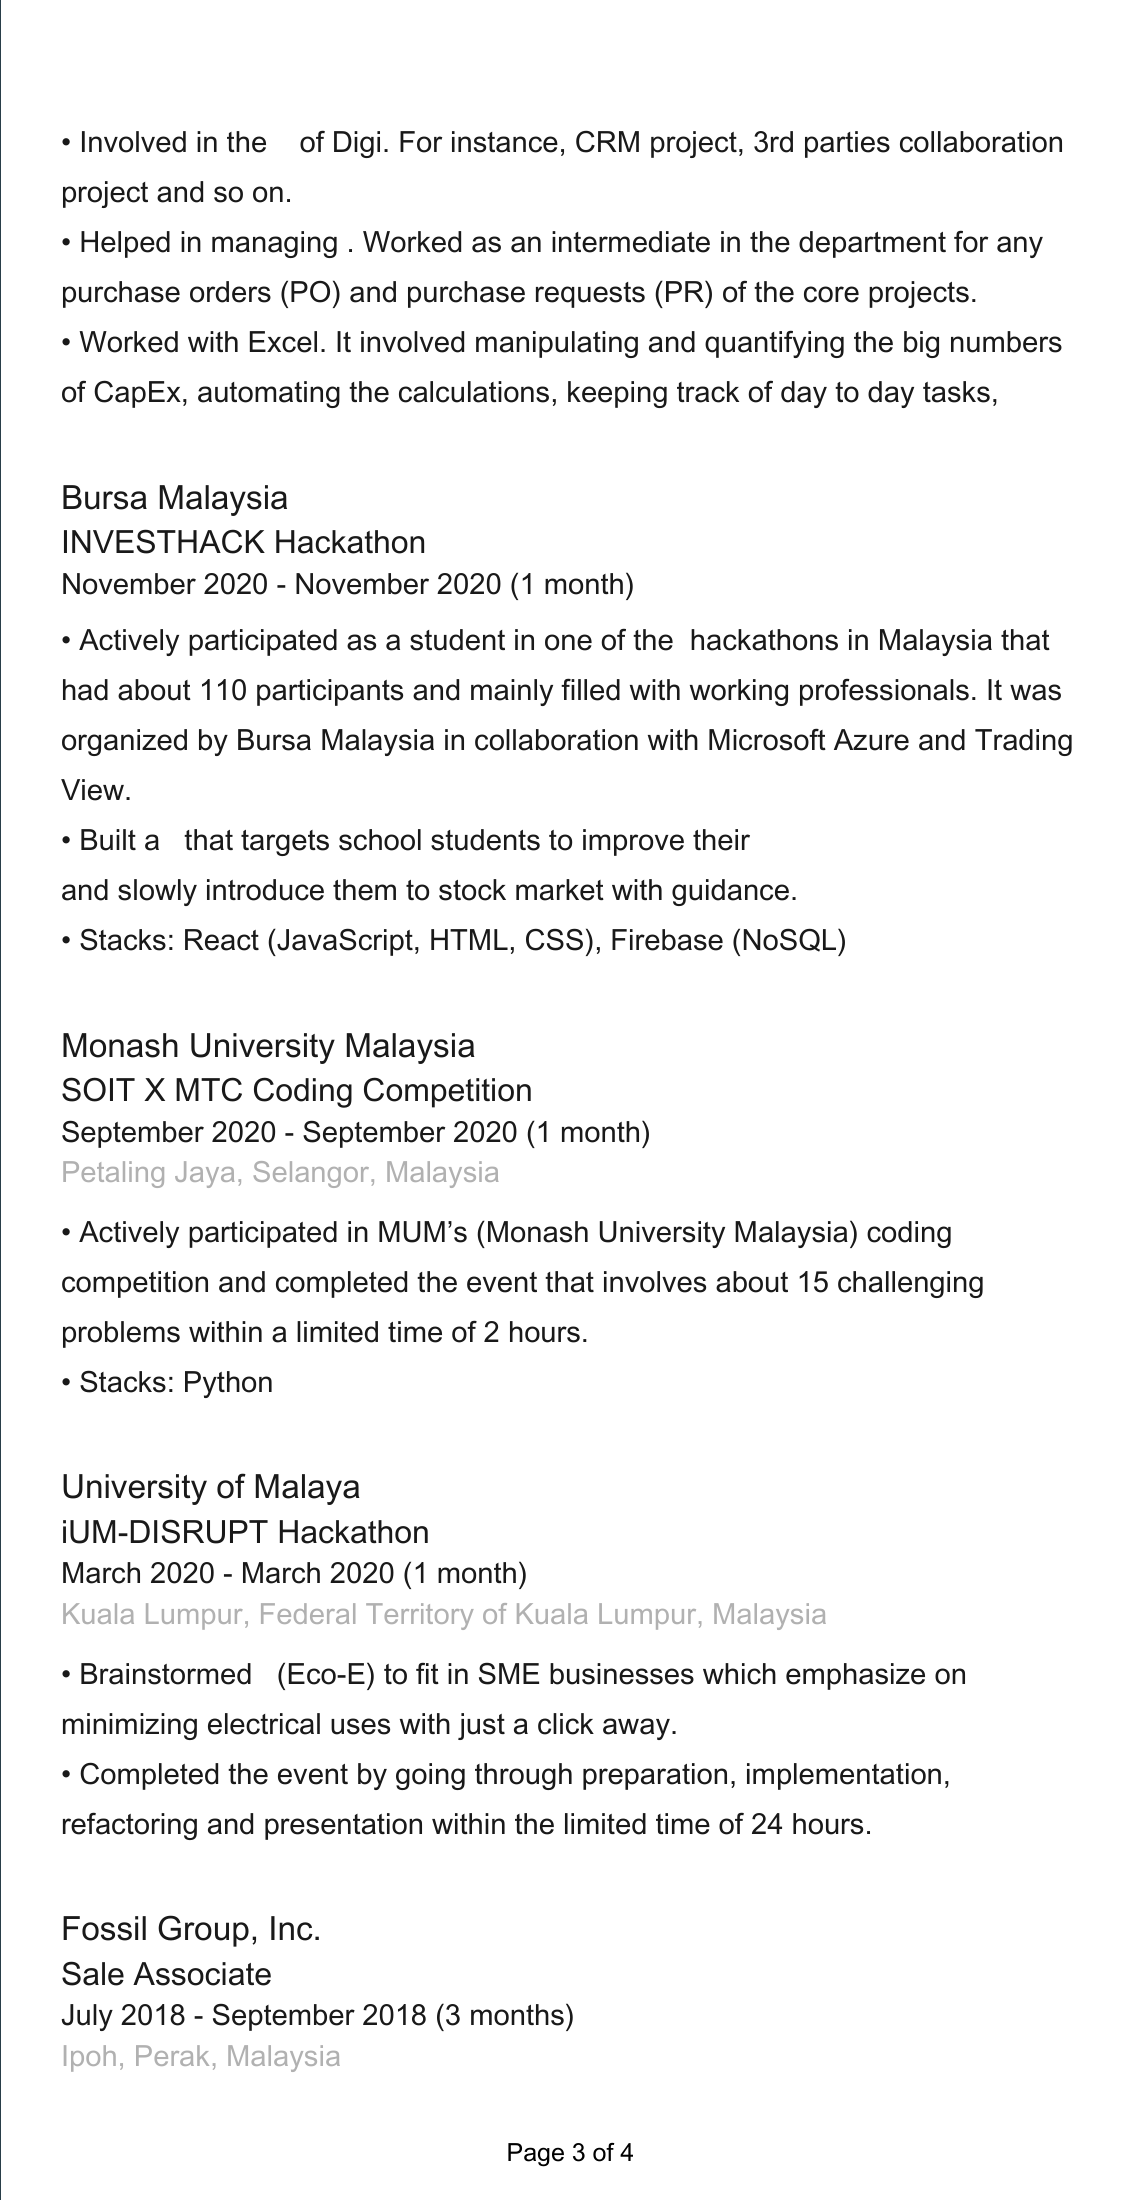

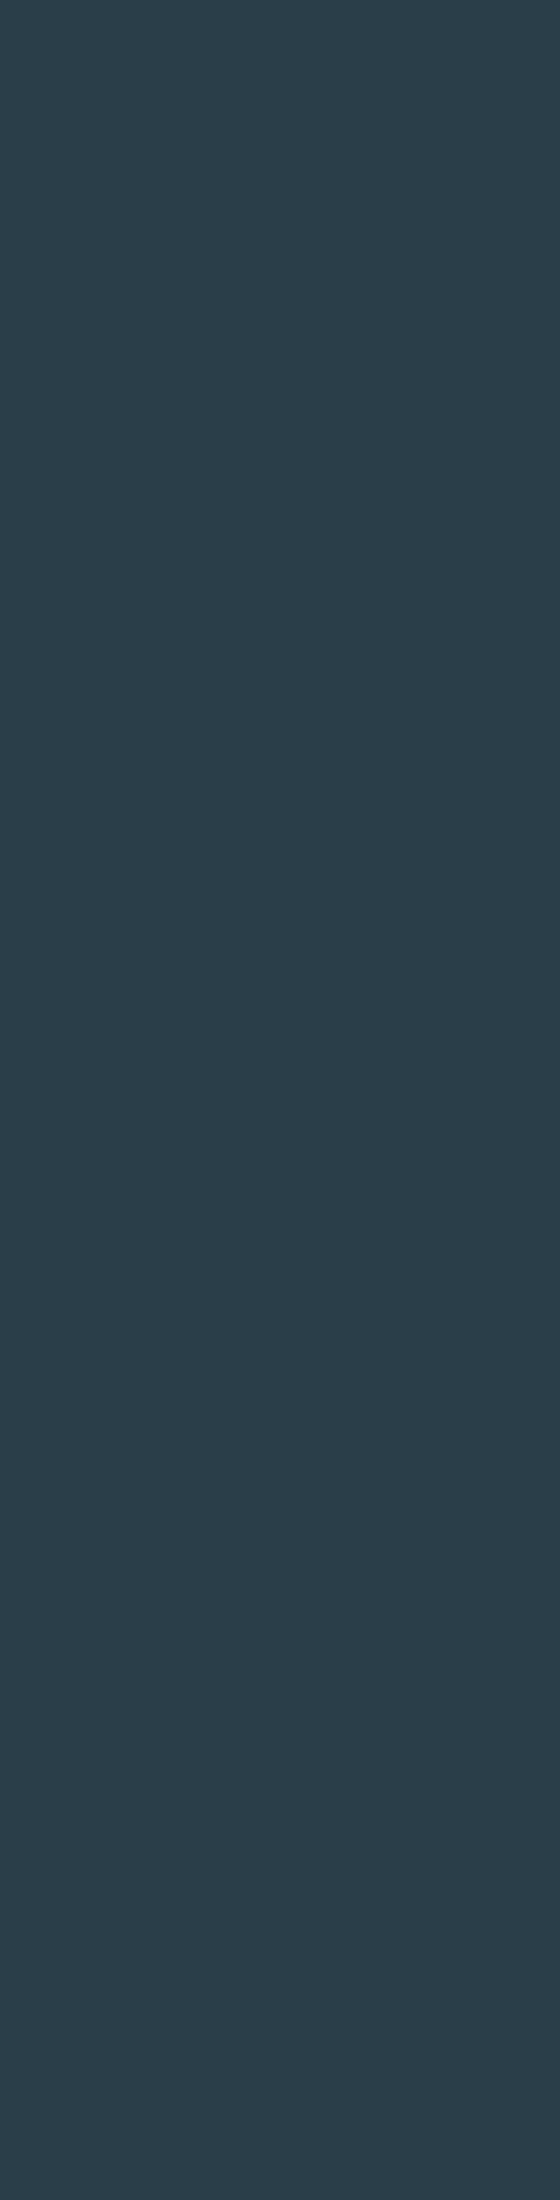

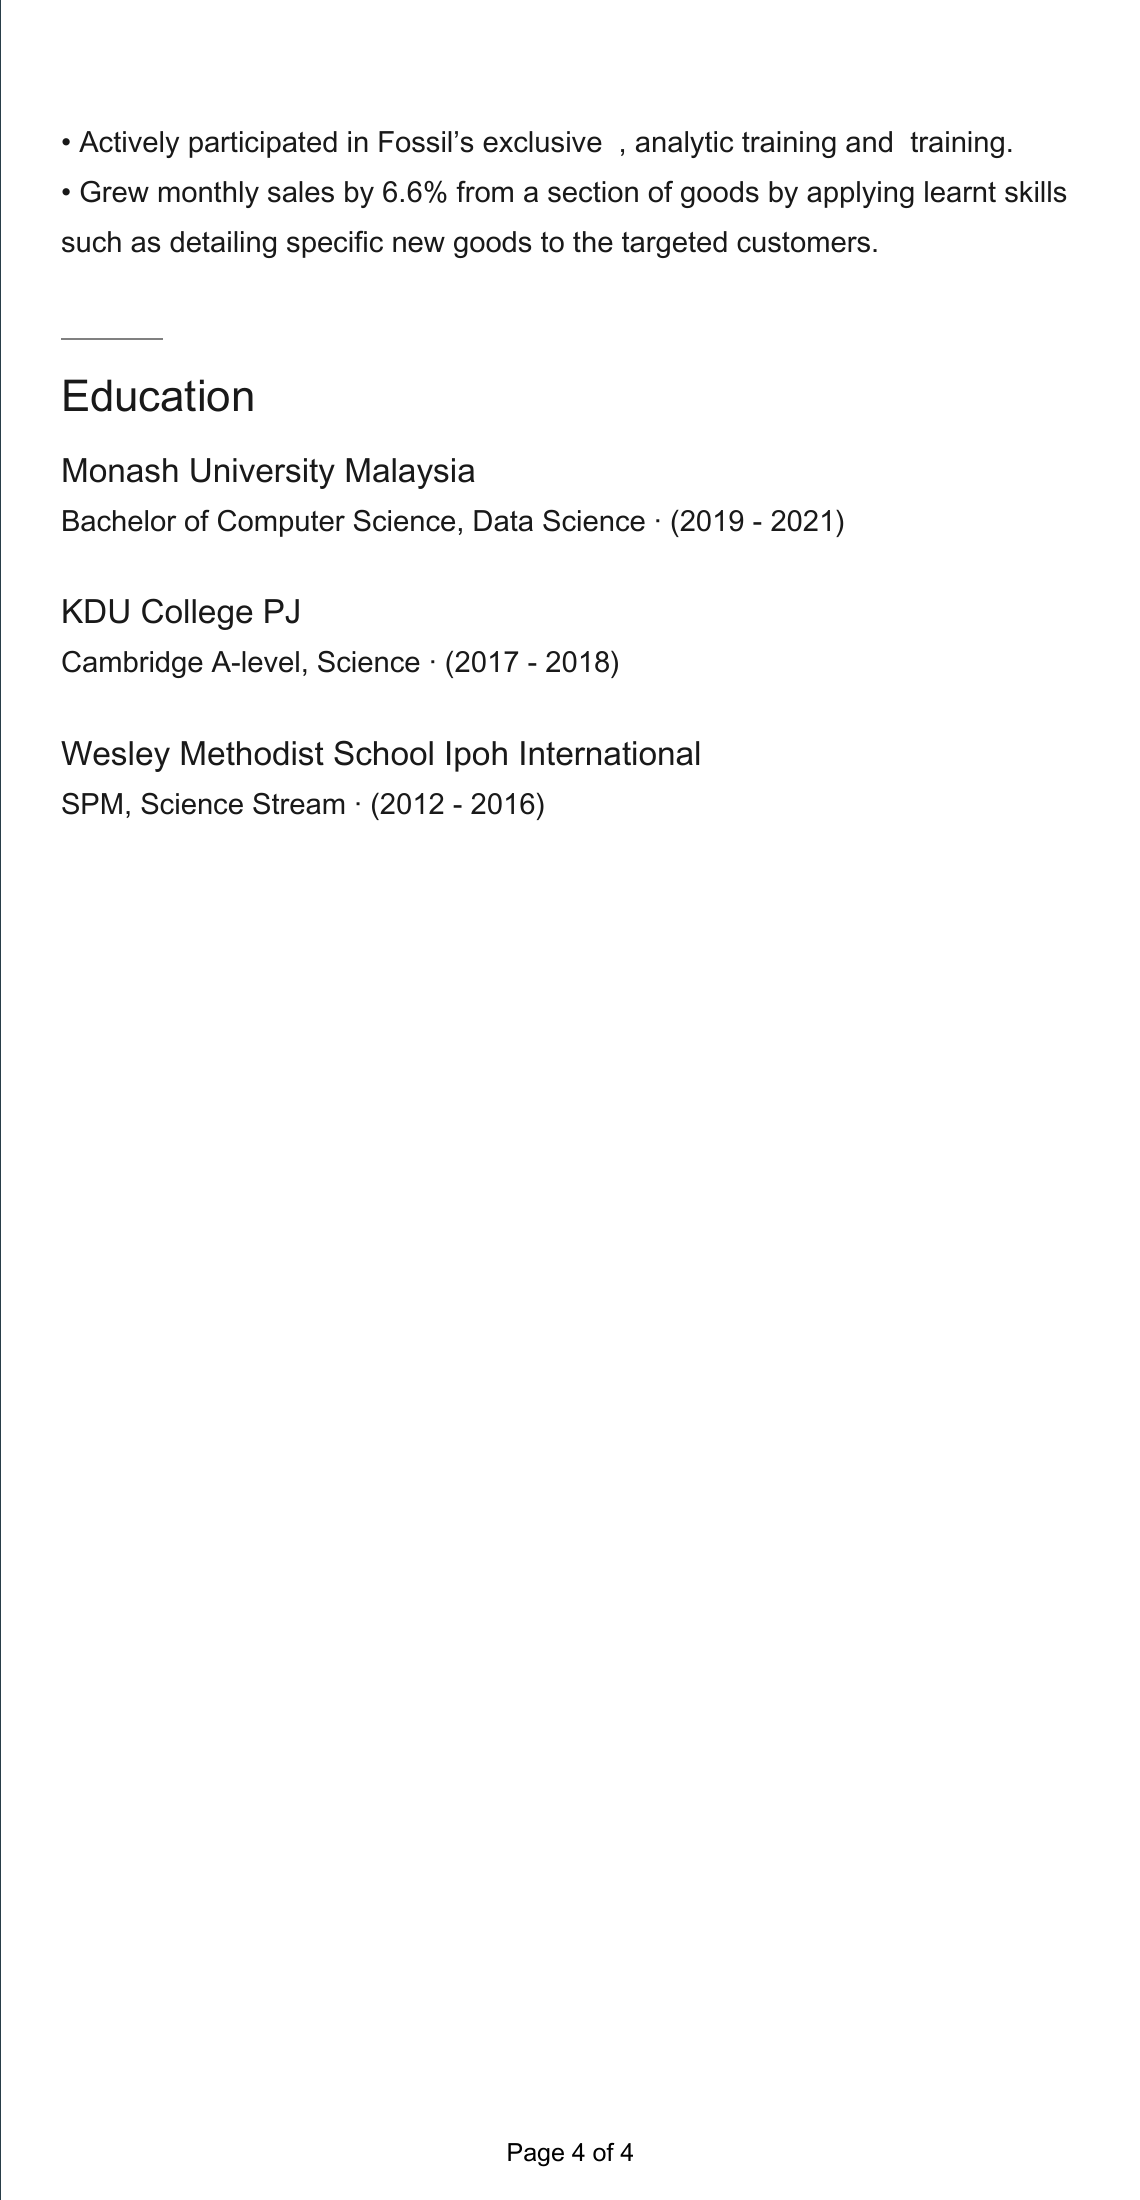

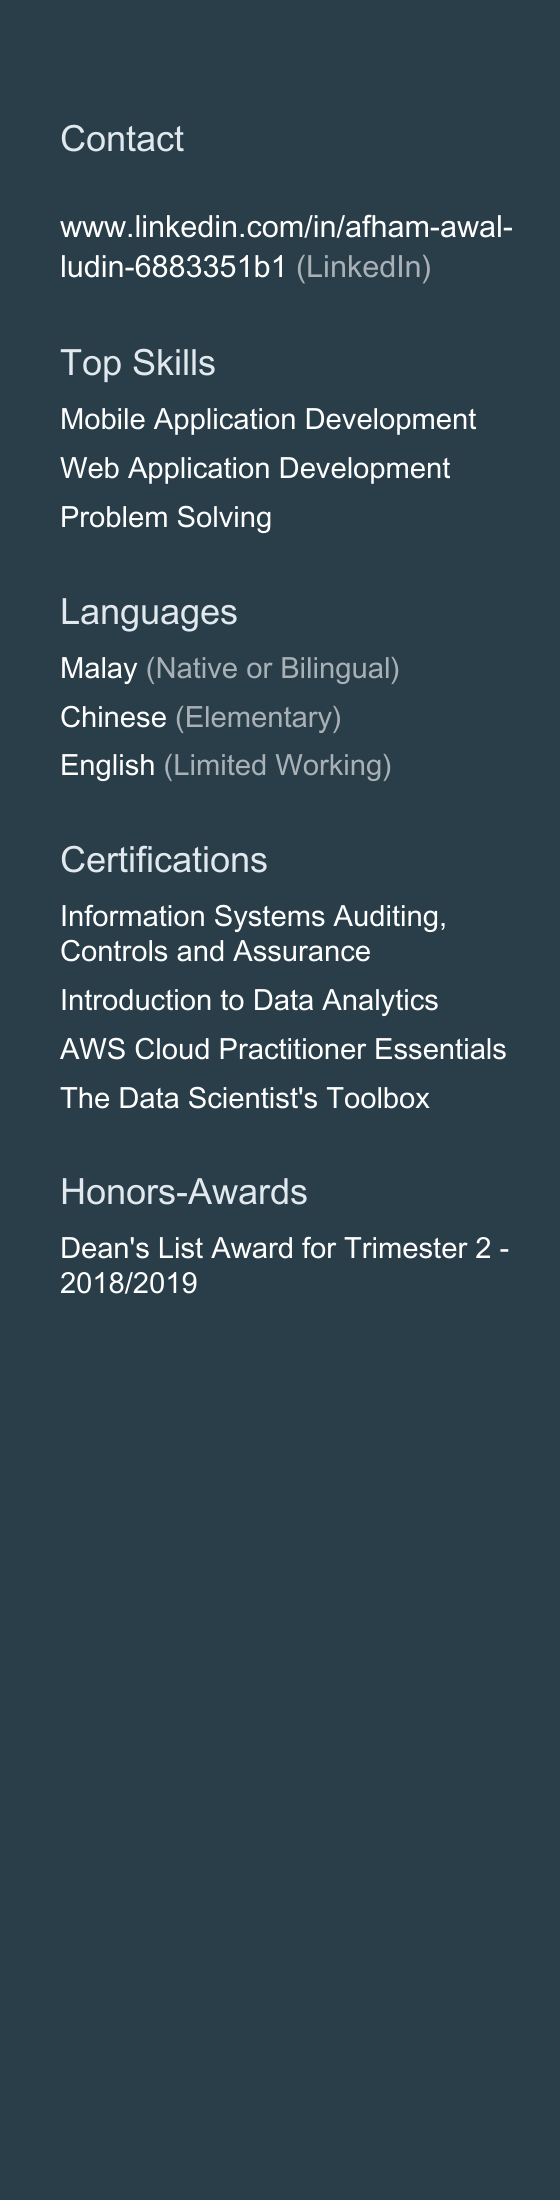

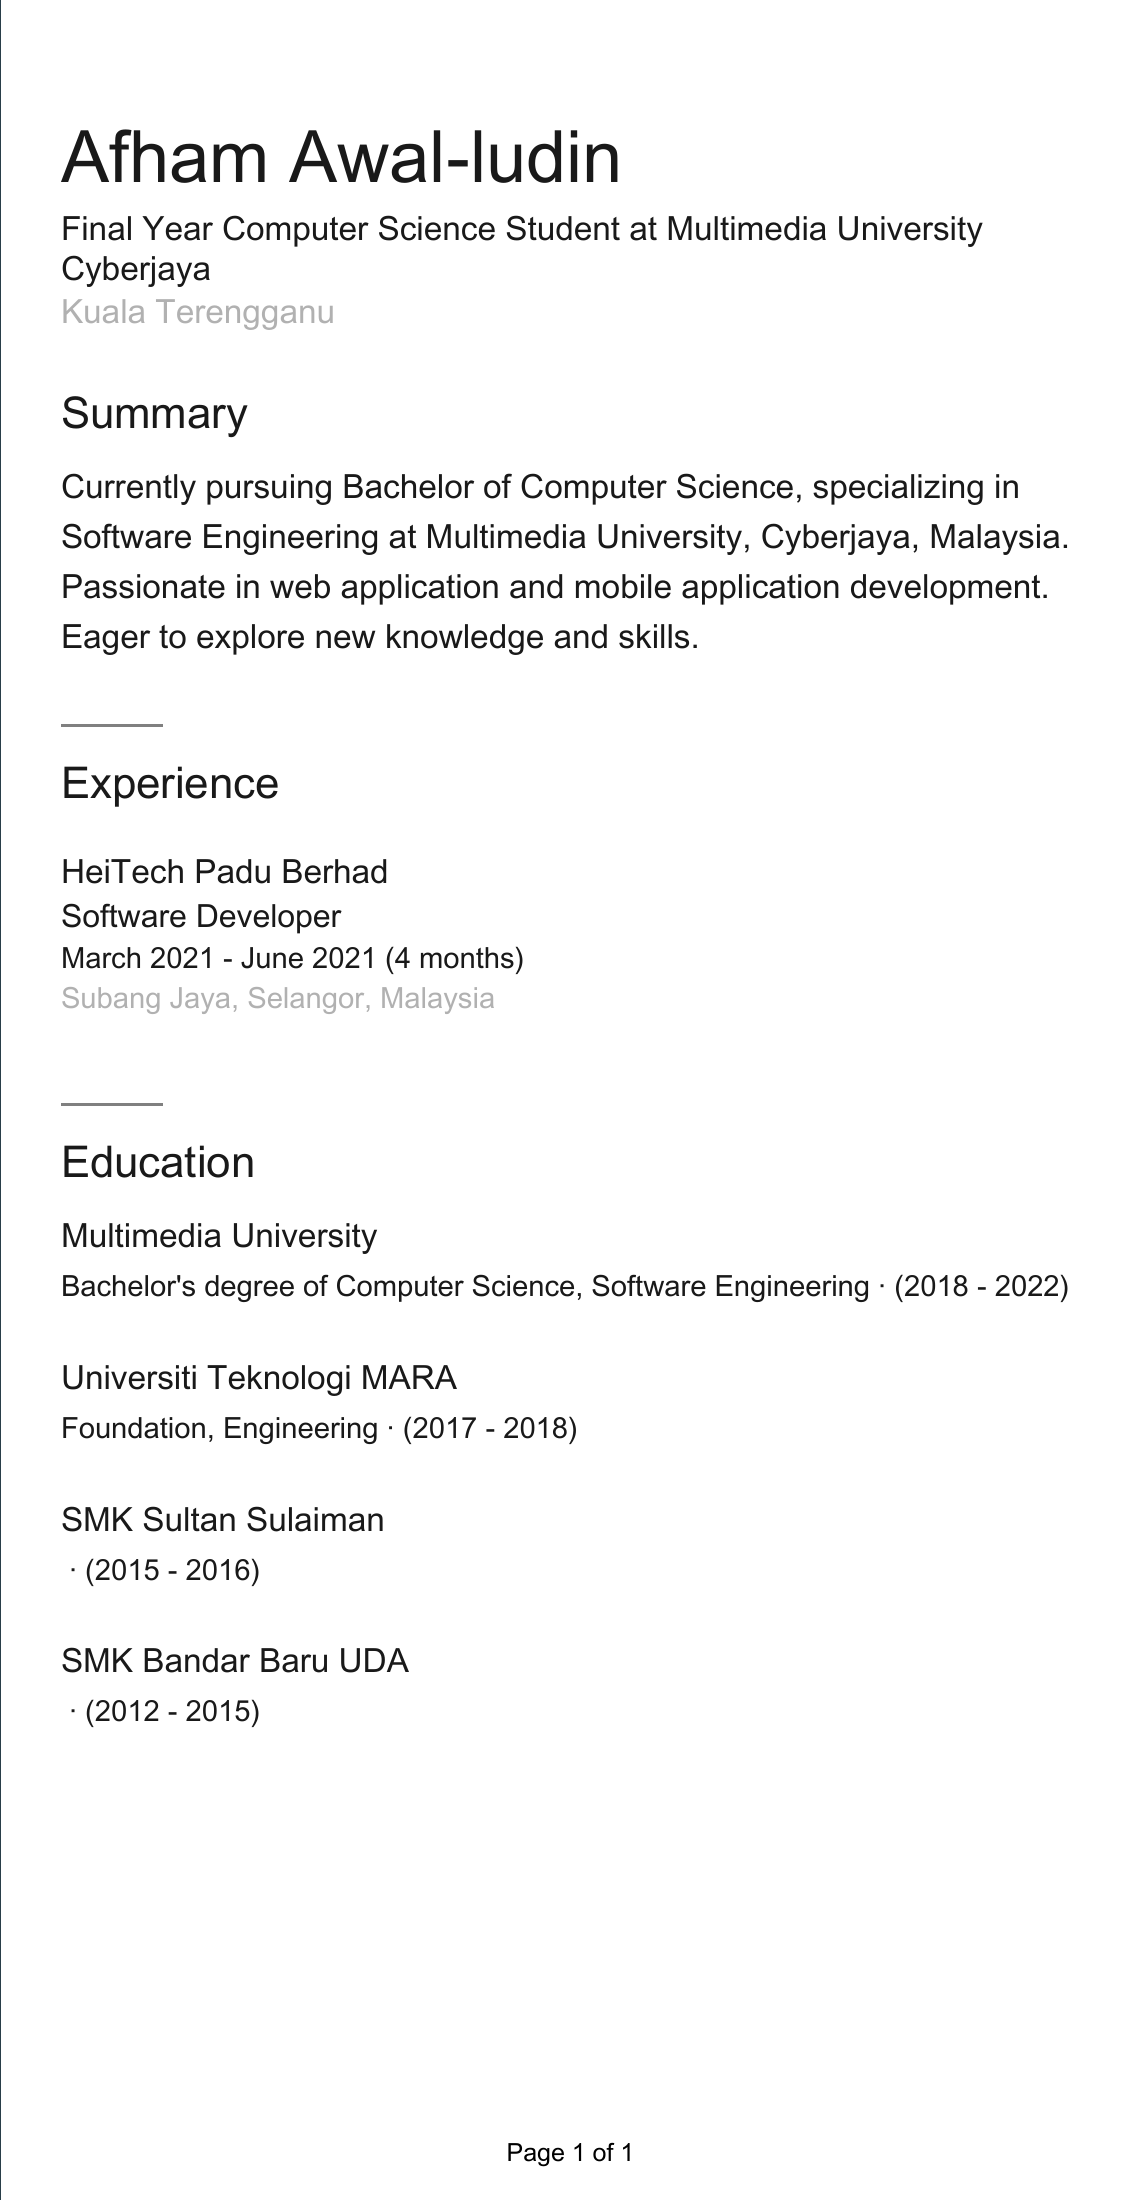

In [104]:
# Pdf is splited into cropped images to ensure that the output of OCR text will be aligned according 

# Import necessary library
from PIL import Image as PIimage
import numpy as np
import sys
from pdf2image import convert_from_path
import os


# Create a directory to store the cropped images for each resume accordingly
parentDir = os.getcwd()
directory = "PDFimageDir"
path = os.path.join(parentDir, directory)
os.mkdir(path)

filecount = 1
directory = "./RawProfile"
parent_storage_dir = "./PDFimageDir"


# For loop to loop through each resume and store each cropped image into a subdirectory in the main directory
for filename in os.listdir(directory):
    if filename.endswith(".pdf"): 
        PDF_path = os.path.join(directory, filename)       
        pages = convert_from_path(PDF_path, poppler_path = "./poppler-0.68.0/bin")
        
        store_file_directory = str(filename)
        path = os.path.join(parent_storage_dir, store_file_directory)
        os.mkdir(path)
        filecount += 1
        
        count = 1
        for number_of_pages in range(len(pages)):
            # Specify the ratio of splitting the pdf into images
            FirstCropped = pages[number_of_pages].crop((0,0,560,2200))
            SecondCropped = pages[number_of_pages].crop((560,0,1700,2200))
            display(FirstCropped)
            FirstCropped = FirstCropped.save(path + "/" + str(count) + ".jpg")
            count += 1

            display(SecondCropped)
            SecondCropped = SecondCropped.save(path + "/" + str(count) + ".jpg")
            count += 1    
    else:
        continue    

# Uipath Integration

In [105]:
%%cmd
cd C:/Users/razor/AppData/Local/Programs/UiPath/Studio
UiRobot.exe execute --file "C:/Users/razor/Desktop/resume-ner/code/Data Retrieval/Resume Data Extraction/Main.xaml"

Microsoft Windows [Version 10.0.19042.1348]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\razor\Desktop\resume-ner\code\Data Retrieval>cd C:/Users/razor/AppData/Local/Programs/UiPath/Studio

(base) C:\Users\razor\AppData\Local\Programs\UiPath\Studio>UiRobot.exe execute --file "C:/Users/razor/Desktop/resume-ner/code/Data Retrieval/Resume Data Extraction/Main.xaml"
{}
(base) C:\Users\razor\AppData\Local\Programs\UiPath\Studio>

# Excel to Json

In [106]:
# The outcome from the Uipath is in excel format
# It is required to convert into json format for further processing

import pandas as pd
excelPath = os.path.join(os.getcwd(), 'NLPoutput.xlsx')

# Read the text from Sheet 1 which is the OCR resume text content in the Excel File
rawText = pd.read_excel(excelPath, sheet_name='Sheet1', header=None)
rawTextDF = pd.DataFrame(rawText, columns=[0])

# Data cleaning to remove "" and \ to prevent errors while handling json file
# It also cleans out additional blank space
for index in rawTextDF.index:
    rawTextDF[0][index] = " ".join(rawTextDF[0][index].split())
    rawTextDF[0][index] = rawTextDF[0][index].replace('"',"'")
    rawTextDF[0][index] = rawTextDF[0][index].replace("\\"," ")
    
print(rawTextDF)

                                                   0
0  Contact www.linkedin.com/in/jun-ming- khong-08...
1  Contact www.linkedin.com/in/afham-awal- ludin-...


In [107]:
pd.options.mode.chained_assignment = None  # remove warning

# Read the text from different Sheet 2 which is the annotation text in the Excel File
annotationText = pd.read_excel (excelPath, sheet_name='Sheet2', header=None) 
annotationTextDF = pd.DataFrame(annotationText)

print(annotationTextDF)

                  0                           1     2                3  \
0    Jun Ming Khong  Monash University Malaysia  2021  1 year 2 months   
1  Afham Awal-ludin       Multimedia University  2022         4 months   

                     4                                                5  \
0                  NaN    www.linkedin.com/in/jun-ming- khong-0893201b5   
1  HeiTech Padu Berhad  www.linkedin.com/in/afham-awal- ludin-6883351b1   

                  6                               7  \
0          Selangor               Critical Thinking   
1  Kuala Terengganu  Mobile Application Development   

                             8                9  
0                   Leadership           Python  
1  Web Application Development  Problem Solving  


In [108]:
# Specify the tagging for each row in Sheet 2
tagging = ["Name","CollegeName","GraduationYear","YearsofExperience","CompaniesWorkAt","Email","Location","Skills","Skills","Skills"]

# Initialize the array
profile_array = np.empty((0, len(tagging)), dtype=np.dtype('a300'))

# Nested for loop here is to loop through every column of annotation in every resume 
# The annotation word is searched in the raw text content to obtain their start position and last position 
for index in rawText.index:
    profile_array = np.append(profile_array, np.array([["0" for i in range(len(tagging))]]), axis=0)
    for col in annotationText.columns:
            line = str(rawTextDF[0][index])
            
            # Search the annotated text is it is not NaN
            if str(annotationText[col][index]) != 'nan':
                search_text = str(annotationText[col][index])
                
                # try and catch is used here just in case the OCR cannot recognize the pdf word clearly and cause error in searching
                try:
                    firstIndex = line.index(search_text)
                    lastIndex = firstIndex + len(search_text)
                    profile_array[index][col] = '{"label":["' + tagging[col] + '"],"points":[{"start":' + str(firstIndex) + ',"end":' + str(lastIndex) + ',"text":"' + str(line[firstIndex:lastIndex]) + '"}]}'
                    print("content: " + str(line[firstIndex:lastIndex]) + " -startpos: " + str(firstIndex) + " -lastpos: " + str(lastIndex))
                except:
                    print("error in finding substring")

    
    print(profile_array[index])
    print()
    
    # Json is generated here
    json_text = '{"content": "' + rawTextDF[0][index] + '","annotation":['
    
    for columns in profile_array[index]:
        # Append the json text if there are annotation occurs in the resume text content
        if columns != "0":
            json_text = json_text + columns + ','
    
    json_text = json_text[:-1] + ']}'
    print(json_text)
    print()
    
    import json
    
    # write to a json file
    with open("./NLPoutput.json", "a", encoding="utf-8") as outfile:
        outfile.write(json_text)
        outfile.write("\n")

content: Jun Ming Khong -startpos: 494 -lastpos: 508
content: Monash University Malaysia -startpos: 4333 -lastpos: 4359
content: 2021 -startpos: 1993 -lastpos: 1997
content: 1 year 2 months -startpos: 1835 -lastpos: 1850
content: www.linkedin.com/in/jun-ming- khong-0893201b5 -startpos: 8 -lastpos: 53
content: Selangor -startpos: 551 -lastpos: 559
content: Critical Thinking -startpos: 76 -lastpos: 93
content: Leadership -startpos: 94 -lastpos: 104
content: Python -startpos: 105 -lastpos: 111
['{"label":["Name"],"points":[{"start":494,"end":508,"text":"Jun Ming Khong"}]}'
 '{"label":["CollegeName"],"points":[{"start":4333,"end":4359,"text":"Monash University Malaysia"}]}'
 '{"label":["GraduationYear"],"points":[{"start":1993,"end":1997,"text":"2021"}]}'
 '{"label":["YearsofExperience"],"points":[{"start":1835,"end":1850,"text":"1 year 2 months"}]}'
 '0'
 '{"label":["Email"],"points":[{"start":8,"end":53,"text":"www.linkedin.com/in/jun-ming- khong-0893201b5"}]}'
 '{"label":["Location"],"p